In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from gemelli.joint_ctf import joint_ctf
from gemelli.tempted import tempted_factorize
from helper_functions import (create_sim_data, plot_mean_signal,
                              plot_loadings)
from biom import load_table

fig_path = '/Users/bec5786/Desktop/temp_figs/'
%matplotlib inline
data_path = '../ipynb/tutorials/'

### Functions

In [2]:
group_colors = {'group1': 'tab:red', 
                'group2': 'tab:blue',
                'group3': 'tab:green'}

def sine_func(x,tps=10):
    amp = 1
    phase = 0
    t = np.linspace(0, 1, tps)
    signal = amp*(1+np.sin(2*np.pi*(t + phase)))
    return np.multiply(x, signal)

def sigmoid(x,tps=10):
    t = np.linspace(-6, 6, tps)
    signal = 1/(1+np.exp(-t))
    return np.multiply(x, signal)

Two modalities:
- Mod1: sine + constant noise
- Mod2: Sigma + constant noise
- Shared features and subjects

### Generate or load data

In [3]:
# _, _, noisy_mod3, mf_mod3 = create_sim_data('mod1', n_timepoints=10, n_subjects=10, 
#                                             num_samples=100, num_features=500,
#                                             rank=2, C_=2e3, spar=2e3,
#                                             fxs=[sine_func], f_intervals=[[(0,250)]],
#                                             s_intervals=[[(0,100)]], plotting=True,
#                                             col_handle='individual')

# _, _, noisy_mod4, mf_mod4 = create_sim_data('mod2', n_timepoints=10, n_subjects=10, 
#                                             num_samples=100, num_features=500,
#                                             rank=2, C_=2e3, spar=2e3,
#                                             fxs=[sigmoid], f_intervals=[[(0,250)]],
#                                             s_intervals=[[(0,100)]], plotting=True,
#                                             col_handle='individual')

In [4]:
# #save data
# with open("noisy_mod3.biom", "w") as f:
#     noisy_mod3.to_json("Table for sign experiments", f)
# with open("noisy_mod4.biom", "w") as f:
#     noisy_mod4.to_json("Table for sign experiments", f)
# #save metadata
# mf_mod3.to_csv("mf_mod3.csv")
# mf_mod4.to_csv("mf_mod4.csv")

In [3]:
# load data, if coming back
noisy_mod3 = load_table('noisy_mod3.biom') 
mf_mod3 = pd.read_csv('mf_mod3.csv', index_col=0)
noisy_mod4 = load_table('noisy_mod4.biom')
mf_mod4 = pd.read_csv('mf_mod4.csv', index_col=0)

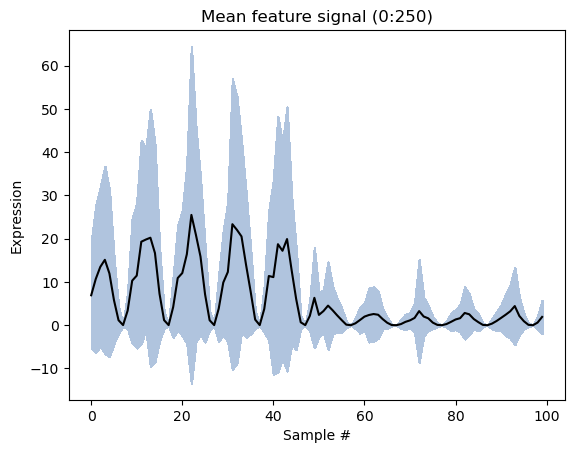

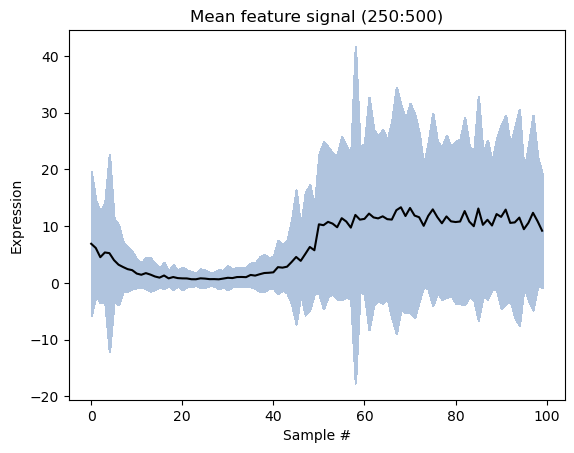

In [4]:
#plot mean signal
plot_mean_signal(noisy_mod3, features=[0, 250], samples=None)
plot_mean_signal(noisy_mod3, features=[250, 500], samples=None)

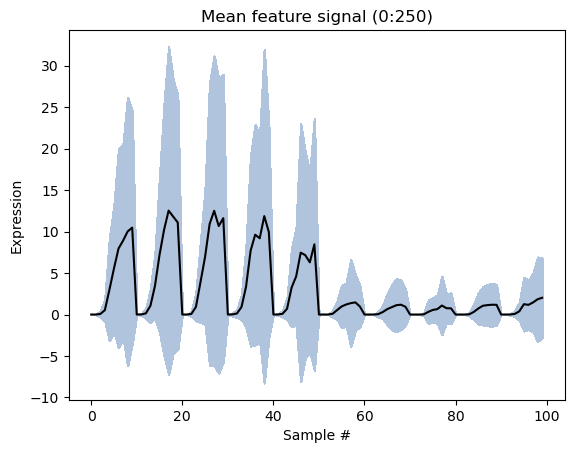

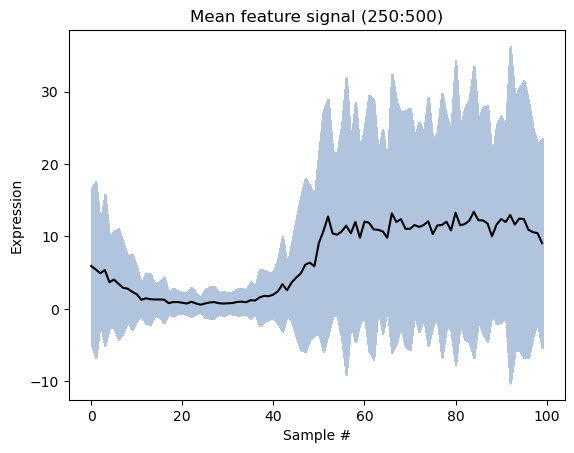

In [5]:
plot_mean_signal(noisy_mod4, features=[0, 250], samples=None)
plot_mean_signal(noisy_mod4, features=[250, 500], samples=None)

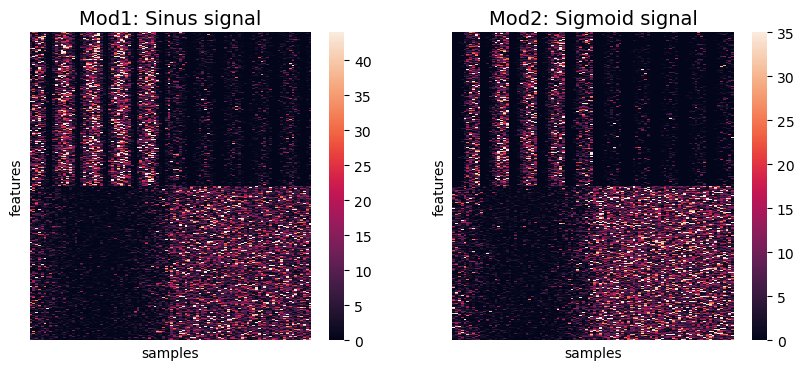

In [6]:
#plot heatmaps for the post-signal modalities
fig, axn = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(noisy_mod3.matrix_data.toarray(), robust=True, 
            ax=axn[0], xticklabels=False, yticklabels=False)
sns.heatmap(noisy_mod4.matrix_data.toarray(), robust=True,
            ax=axn[1], xticklabels=False, yticklabels=False)
axn[0].set_title('Mod1: Sinus signal', color='black', fontsize=14)
axn[1].set_title('Mod2: Sigmoid signal', color='black', fontsize=14)
plt.setp(axn, xlabel='samples', ylabel='features')
plt.show()

In [7]:
# plot_mean_signal(noisy_mod3, features=[0, 250], samples=None)
# plot_mean_signal(noisy_mod4, features=[0, 250], samples=None)

### using a-hat as anchor

Calculate components for component_1
Reached convergence in 6 iterations
Calculate components for component_2
Negative singular values detected (-843). Revising signs.
Negative singular values detected (-207). Revising signs.
Negative singular values detected (-853). Revising signs.
Reached convergence in 15 iterations
Calculate components for component_3
Negative singular values detected (-935). Revising signs.
Negative singular values detected (-1537). Revising signs.
Negative singular values detected (-1731). Revising signs.
Negative singular values detected (-450). Revising signs.
Negative singular values detected (-492). Revising signs.
Negative singular values detected (-526). Revising signs.
Reached convergence in 14 iterations


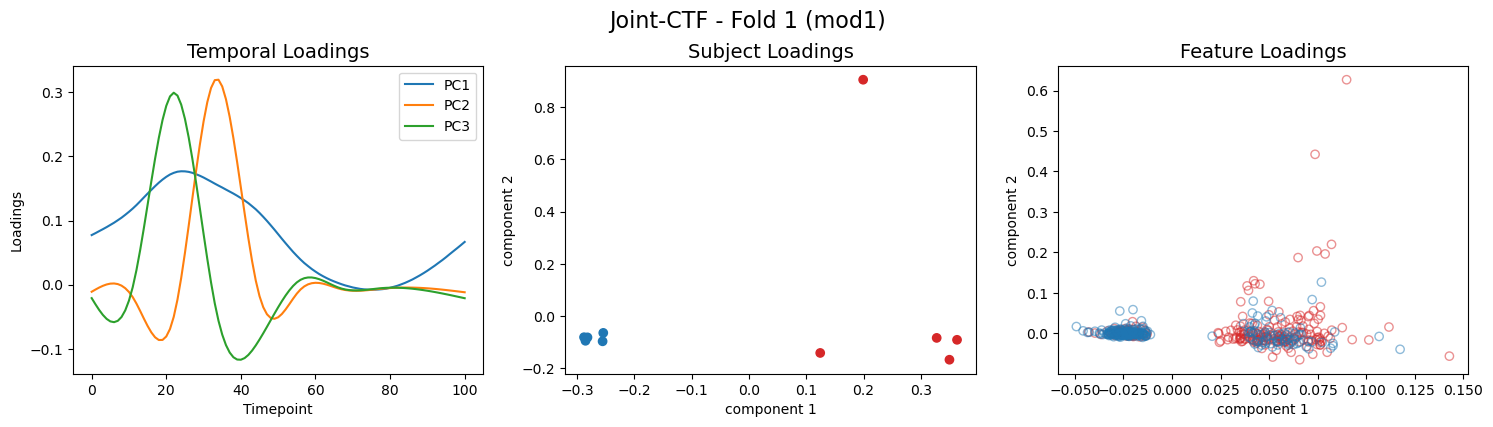

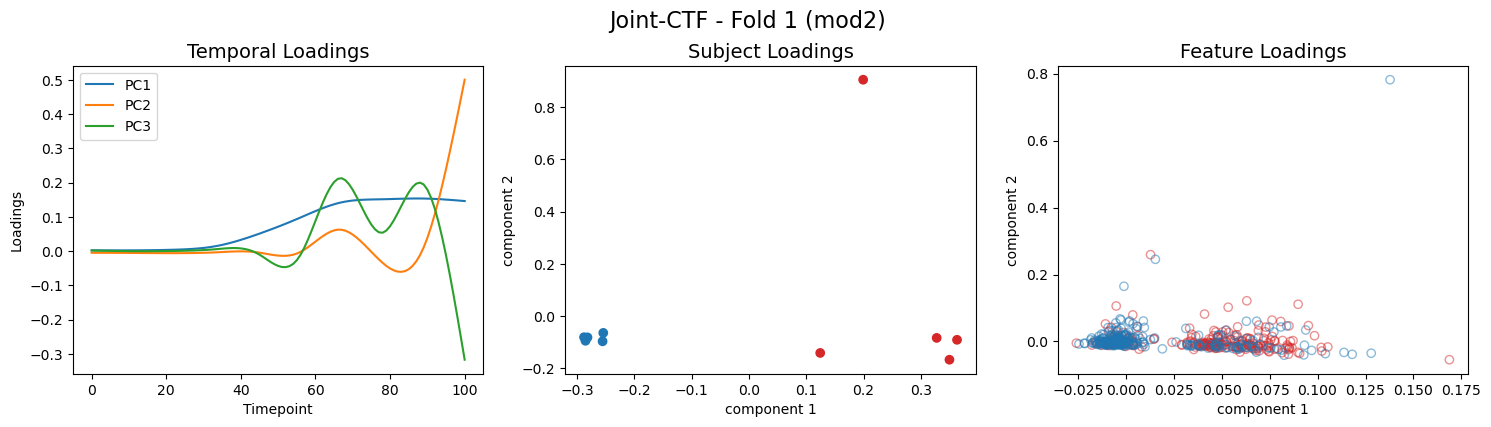

Subject loadings
[-1.1102230246251565e-16, -2.220446049250313e-16, -4.163336342344337e-17]
[-1.0, -1.0, -1.0]
Feature loadings
[1.0, 1.0, 1.0]
State loadings
[1.0, 1.0, 1.0]

Feature loadings
[1.0, 1.0, 1.0]
State loadings
[1.0, 1.0, 1.0]

Calculate components for component_1
Reached convergence in 6 iterations
Calculate components for component_2
Negative singular values detected (-714). Revising signs.
Negative singular values detected (-338). Revising signs.
Negative singular values detected (-621). Revising signs.
Negative singular values detected (-716). Revising signs.
Negative singular values detected (-741). Revising signs.
Negative singular values detected (-770). Revising signs.
Negative singular values detected (-791). Revising signs.
Negative singular values detected (-806). Revising signs.
Negative singular values detected (-817). Revising signs.
Negative singular values detected (-824). Revising signs.
Negative singular values detected (-830). Revising signs.
Negative sin

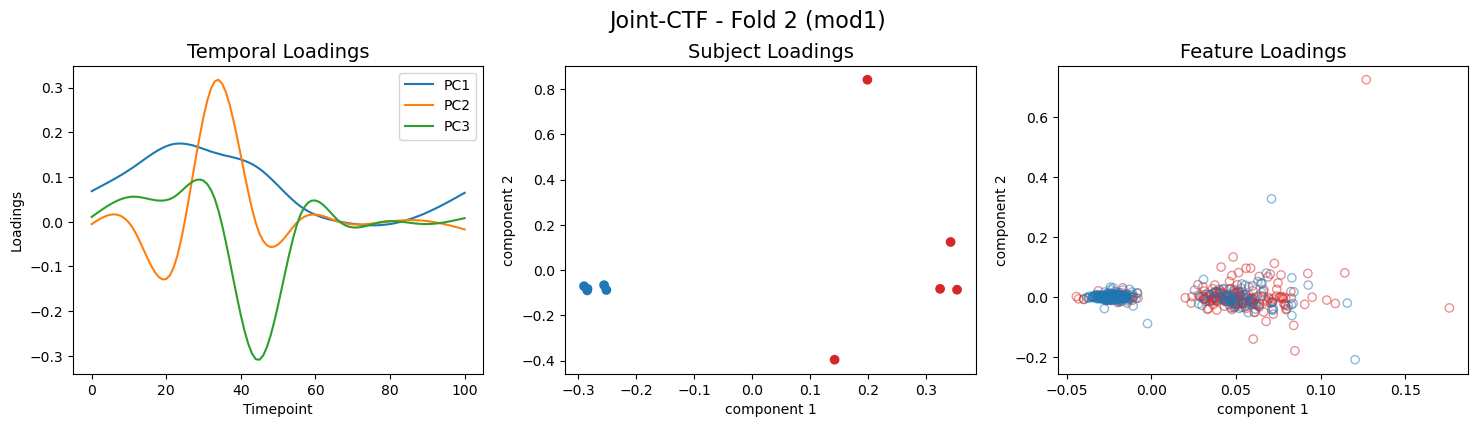

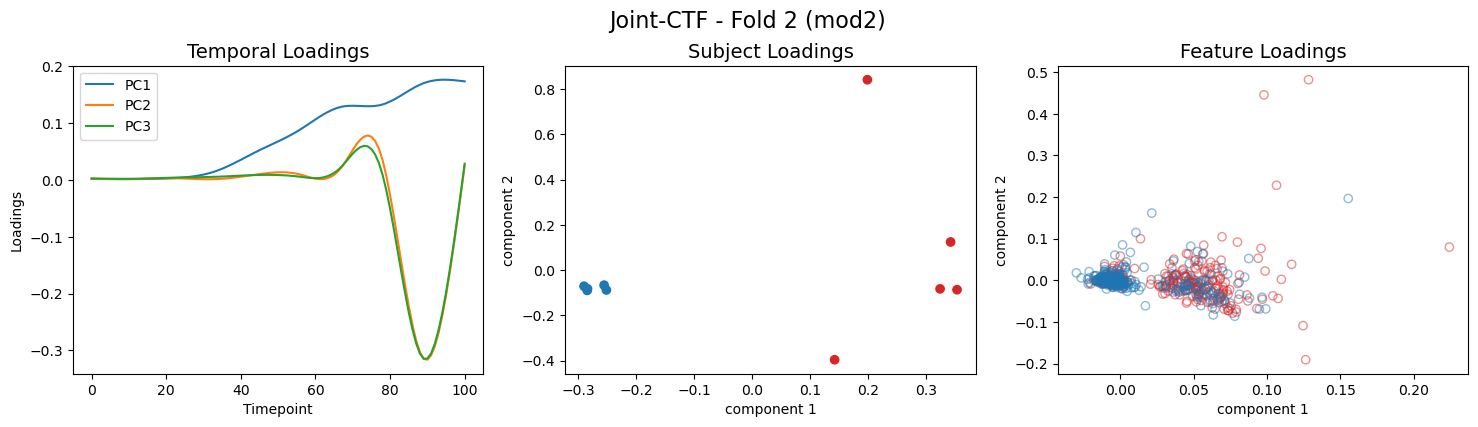

Subject loadings
[2.220446049250313e-16, 8.326672684688674e-17, 2.7755575615628914e-17]
[1.0, 1.0, 1.0]
Feature loadings
[1.0, 1.0, -1.0]
State loadings
[1.0, 1.0, -1.0]

Feature loadings
[1.0, -1.0, -1.0]
State loadings
[1.0, -1.0, -1.0]

Calculate components for component_1
Reached convergence in 7 iterations
Calculate components for component_2
Negative singular values detected (-433). Revising signs.
Negative singular values detected (-1372). Revising signs.
Negative singular values detected (-1294). Revising signs.
Negative singular values detected (-1475). Revising signs.
Negative singular values detected (-958). Revising signs.
Negative singular values detected (-665). Revising signs.
Reached convergence in 21 iterations
Calculate components for component_3
Negative singular values detected (-1413). Revising signs.
Negative singular values detected (-1616). Revising signs.
Negative singular values detected (-1789). Revising signs.
Negative singular values detected (-1728). Revis

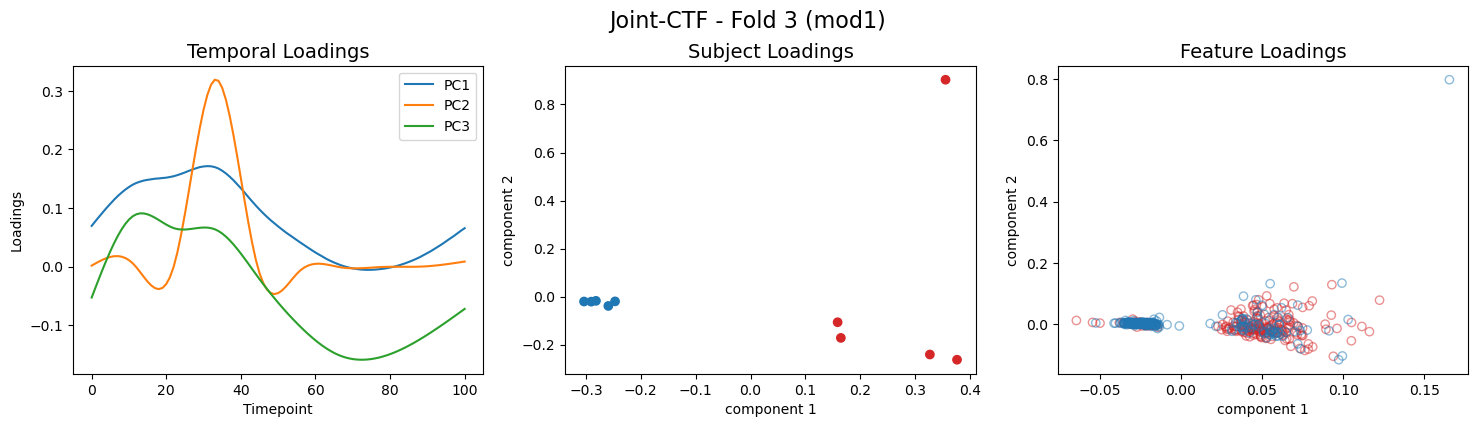

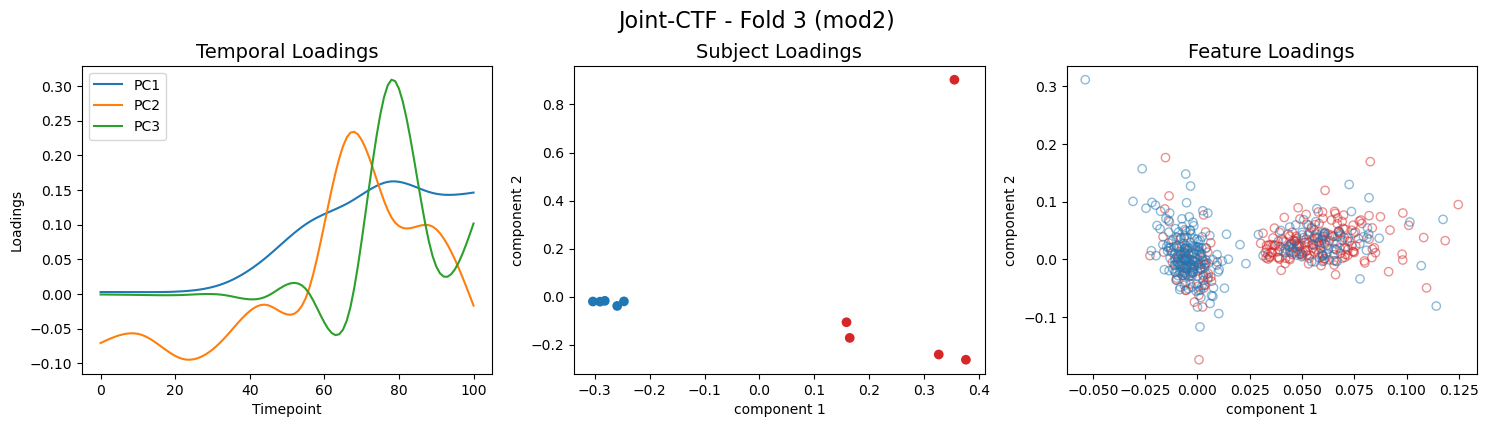

Subject loadings
[7.216449660063518e-16, -9.020562075079397e-17, 3.885780586188048e-16]
[1.0, -1.0, 1.0]
Feature loadings
[1.0, 1.0, -1.0]
State loadings
[1.0, 1.0, -1.0]

Feature loadings
[1.0, 1.0, 1.0]
State loadings
[1.0, 1.0, 1.0]

Calculate components for component_1
Reached convergence in 7 iterations
Calculate components for component_2
Negative singular values detected (-915). Revising signs.
Reached convergence in 20 iterations
Calculate components for component_3
Negative singular values detected (-778). Revising signs.
Negative singular values detected (-577). Revising signs.
Negative singular values detected (-540). Revising signs.
Negative singular values detected (-529). Revising signs.
Negative singular values detected (-524). Revising signs.
Negative singular values detected (-522). Revising signs.
Negative singular values detected (-520). Revising signs.
Negative singular values detected (-519). Revising signs.
Negative singular values detected (-519). Revising signs.

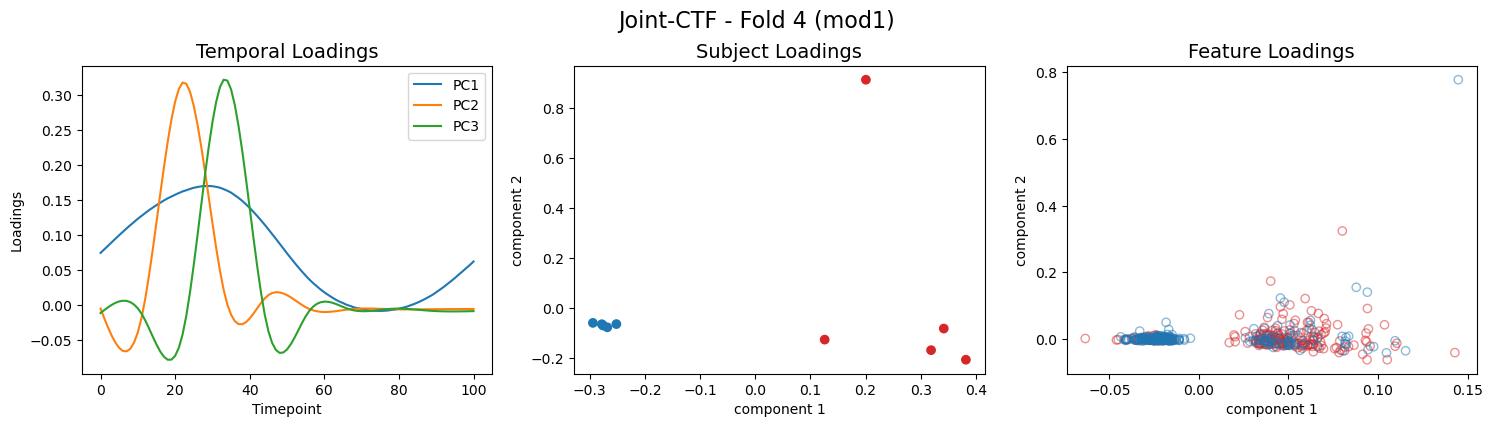

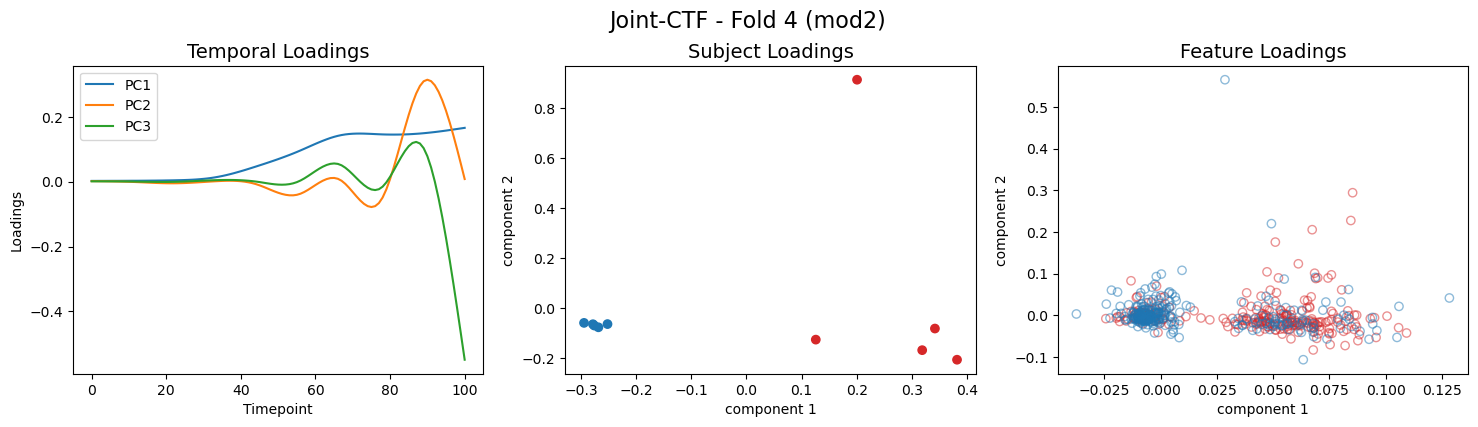

Subject loadings
[2.220446049250313e-16, 5.551115123125783e-17, -1.1102230246251565e-16]
[1.0, 1.0, -1.0]
Feature loadings
[1.0, 1.0, 1.0]
State loadings
[1.0, 1.0, 1.0]

Feature loadings
[1.0, 1.0, -1.0]
State loadings
[1.0, 1.0, -1.0]

Calculate components for component_1
Reached convergence in 7 iterations
Calculate components for component_2
Negative singular values detected (-742). Revising signs.
Negative singular values detected (-577). Revising signs.
Negative singular values detected (-586). Revising signs.
Negative singular values detected (-703). Revising signs.
Negative singular values detected (-767). Revising signs.
Negative singular values detected (-788). Revising signs.
Negative singular values detected (-797). Revising signs.
Negative singular values detected (-801). Revising signs.
Negative singular values detected (-805). Revising signs.
Negative singular values detected (-809). Revising signs.
Negative singular values detected (-812). Revising signs.
Negative singu

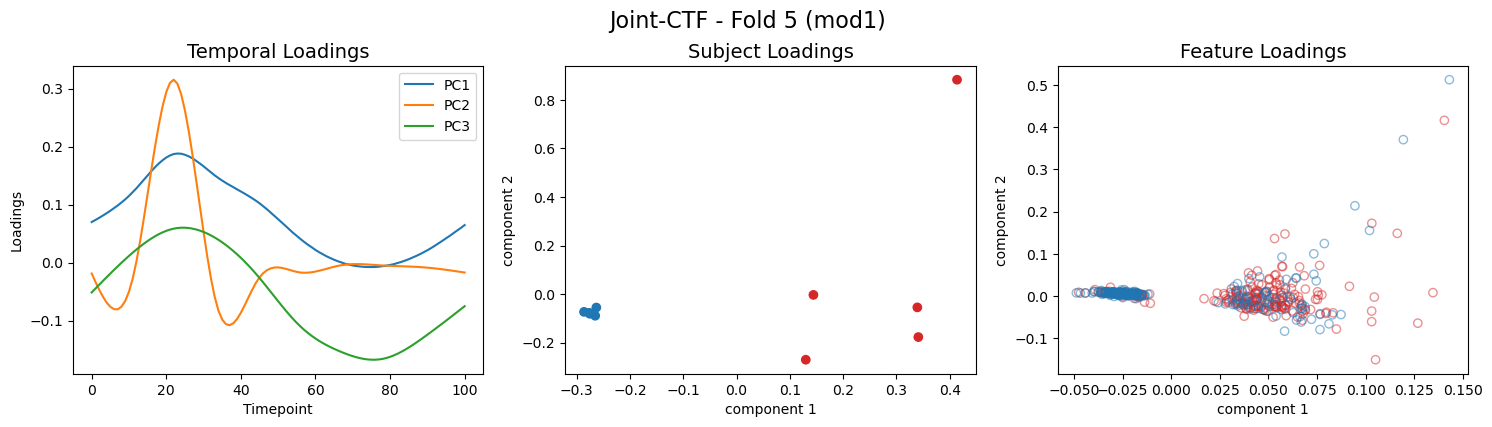

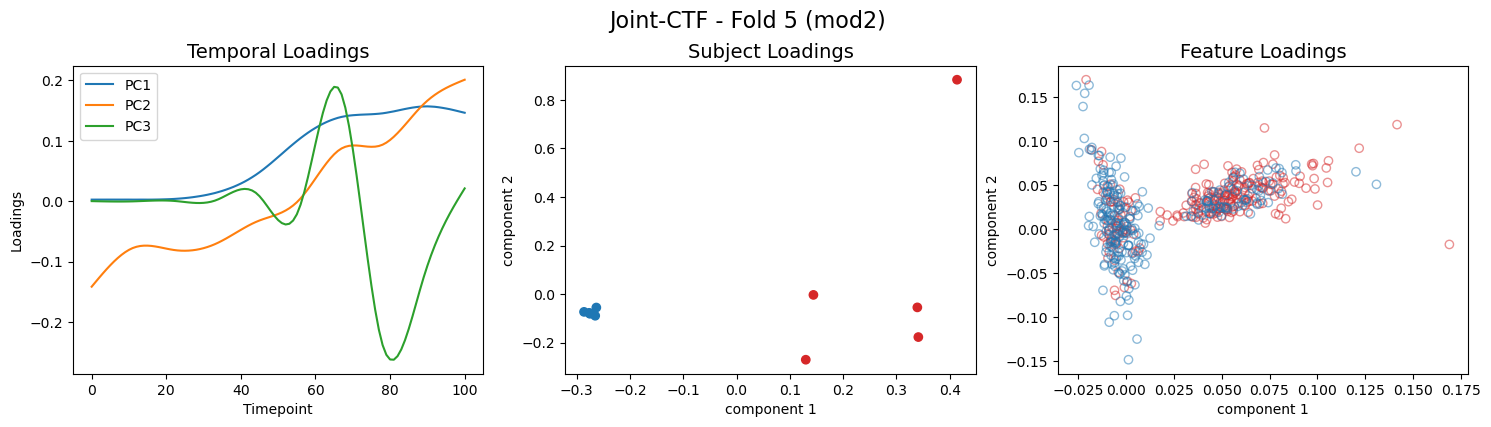

Subject loadings
[2.220446049250313e-16, 1.3877787807814457e-17, -3.3306690738754696e-16]
[1.0, 1.0, -1.0]
Feature loadings
[1.0, 1.0, -1.0]
State loadings
[1.0, 1.0, -1.0]

Feature loadings
[1.0, 1.0, -1.0]
State loadings
[1.0, 1.0, -1.0]



In [6]:
for i in range(0,5):
    _, _, noisy_mod3, mf_mod3 = create_sim_data('mod1', n_timepoints=10, n_subjects=10, 
                                            num_samples=100, num_features=500,
                                            rank=2, C_=2e3, spar=2e3,
                                            fxs=[sine_func], f_intervals=[[(0,250)]],
                                            s_intervals=[[(0,100)]], plotting=False,
                                            col_handle='individual')

    _, _, noisy_mod4, mf_mod4 = create_sim_data('mod2', n_timepoints=10, n_subjects=10, 
                                                num_samples=100, num_features=500,
                                                rank=2, C_=2e3, spar=2e3,
                                                fxs=[sigmoid], f_intervals=[[(0,250)]],
                                                s_intervals=[[(0,100)]], plotting=False,
                                                col_handle='individual')
    
    #run joint-ctf
    (subject_loads, feature_loads, state_loads,
    evals, var_explained, feature_covs) = joint_ctf(tables=[noisy_mod3, noisy_mod4],
                                                    sample_metadatas=[mf_mod3, mf_mod4],
                                                    modality_ids=['mod1', 'mod2'],
                                                    individual_id_column='ind_id',
                                                    state_column='timepoint')
    
    subject_loads_ = {}
    subject_loads_['mod1'] = subject_loads
    subject_loads_['mod2'] = subject_loads
        

    plot_loadings(loadings=[state_loads, feature_loads, subject_loads_],
              mf=mf_mod3, group_colors=group_colors, title='Joint-CTF - Fold {}'.format(i+1),
              comp1='component_1', comp2='component_2', mod_name='mod1',
              ft_groups=[(0,250),(250,500)], ft_names=['group1','group2'])

    plot_loadings(loadings=[state_loads, feature_loads, subject_loads_],
                mf=mf_mod4, group_colors=group_colors, title='Joint-CTF - Fold {}'.format(i+1),
                comp1='component_1', comp2='component_2', mod_name='mod2',
                ft_groups=[(0,250),(250,500)], ft_names=['group1','group2'])
    
    #check signs of loadings
    print("Subject loadings")
    print(np.sum(subject_loads[['component_1', 'component_2', 'component_3']]).tolist())
    print(np.sign(np.sum(subject_loads[['component_1', 'component_2', 'component_3']])).tolist())
    print("Feature loadings")
    print(np.sign(np.sum(feature_loads['mod1'][['component_1', 'component_2', 'component_3']])).tolist())
    print("State loadings")
    print(np.sign(np.sum(state_loads['mod1'][['component_1', 'component_2', 'component_3']])).tolist())
    print()
    print("Feature loadings")
    print(np.sign(np.sum(feature_loads['mod2'][['component_1', 'component_2', 'component_3']])).tolist())
    print("State loadings")
    print(np.sign(np.sum(state_loads['mod2'][['component_1', 'component_2', 'component_3']])).tolist())
    print()

Calculate components for component_1
Reached convergence in 6 iterations
Calculate components for component_2
Negative singular values detected (-777). Revising signs.
Reached convergence in 21 iterations
Calculate components for component_3
Negative singular values detected (-1148). Revising signs.
Negative singular values detected (-1510). Revising signs.
Negative singular values detected (-1629). Revising signs.
Negative singular values detected (-1626). Revising signs.
Negative singular values detected (-1623). Revising signs.
Negative singular values detected (-1619). Revising signs.
Negative singular values detected (-1616). Revising signs.
Negative singular values detected (-1615). Revising signs.
Negative singular values detected (-1616). Revising signs.
Negative singular values detected (-1618). Revising signs.
Negative singular values detected (-1620). Revising signs.
Negative singular values detected (-1622). Revising signs.
Negative singular values detected (-1625). Revisin

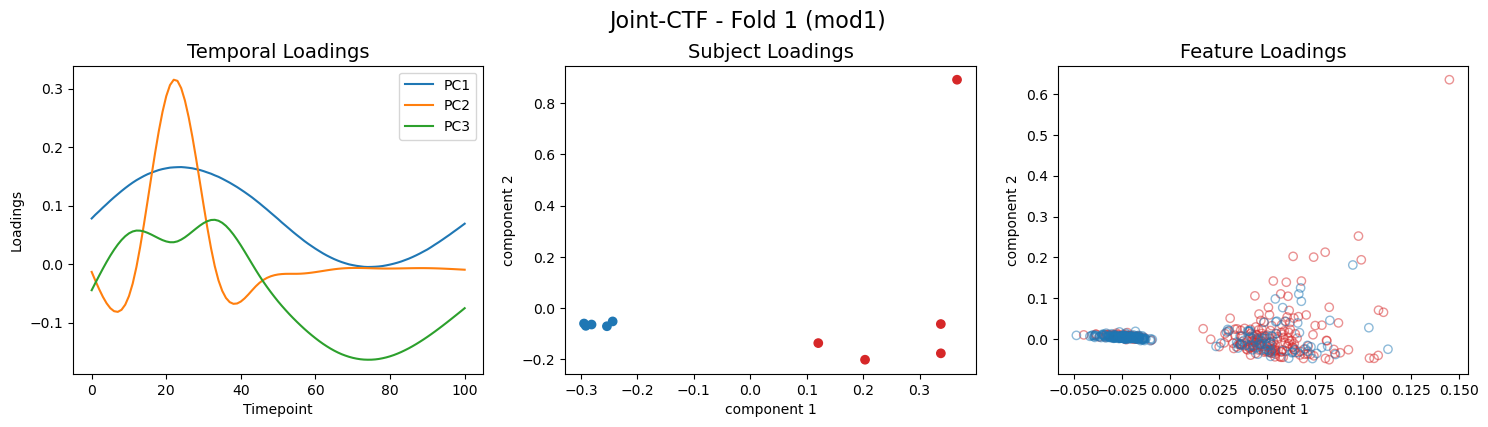

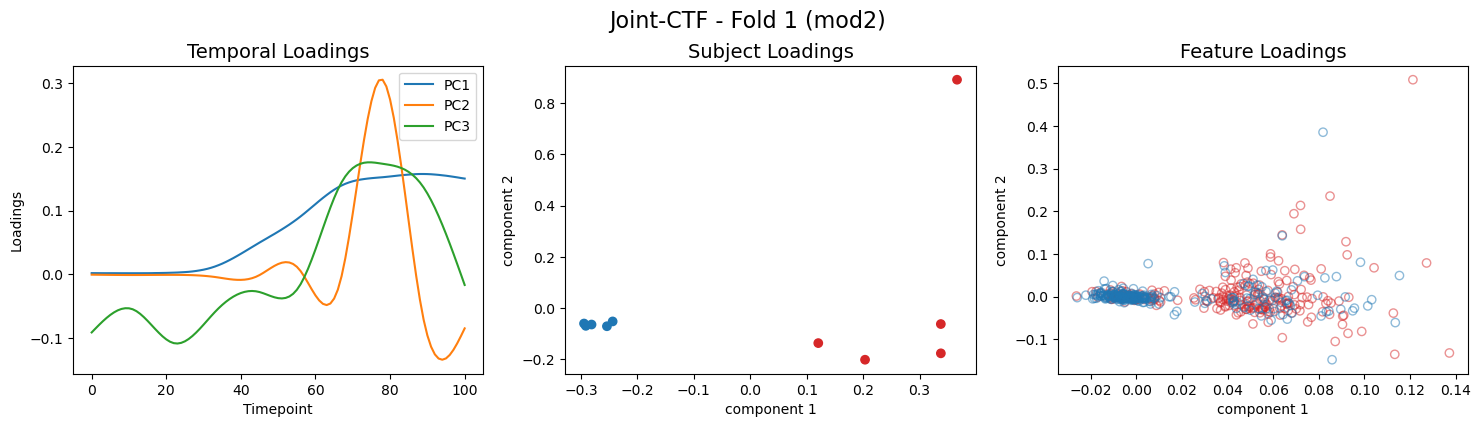

      component_1  component_2  component_3
mod1  3865.437081  1847.363247  1632.618389
mod2  2374.400047   931.640898   855.593641

Subject loadings
[-1.1102230246251565e-16, 0.0, 5.551115123125783e-17]
[-1.0, 0.0, 1.0]

Feature loadings
[1.0, 1.0, -1.0]
State loadings
[1.0, 1.0, -1.0]

Feature loadings
[1.0, 1.0, 1.0]
State loadings
[1.0, 1.0, 1.0]

Calculate components for component_1
Reached convergence in 6 iterations
Calculate components for component_2
Negative singular values detected (-772). Revising signs.
Reached convergence in 21 iterations
Calculate components for component_3
Negative singular values detected (-1137). Revising signs.
Negative singular values detected (-1504). Revising signs.
Negative singular values detected (-1628). Revising signs.
Negative singular values detected (-1627). Revising signs.
Negative singular values detected (-1625). Revising signs.
Negative singular values detected (-1620). Revising signs.
Negative singular values detected (-1617). Revisin

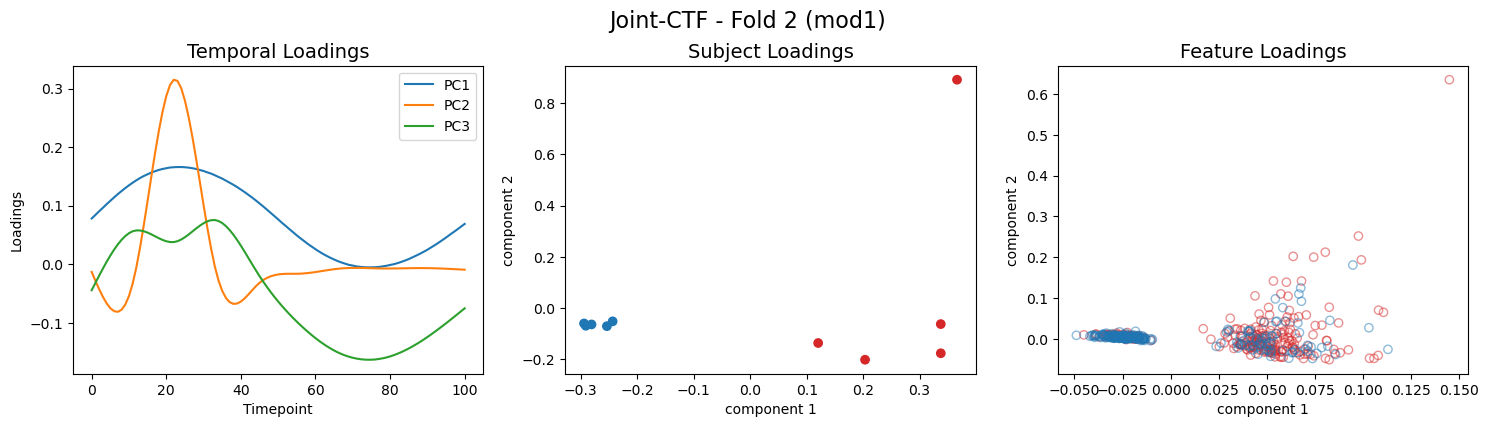

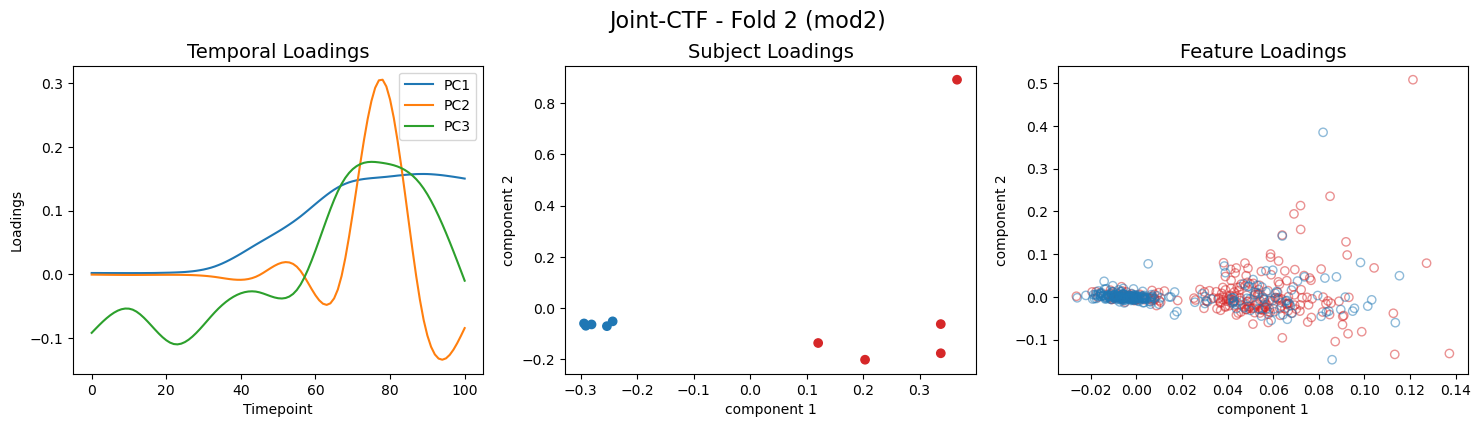

      component_1  component_2  component_3
mod1  3865.591958  1847.031772  1628.331443
mod2  2374.587556   931.866863   860.997104

Subject loadings
[2.7755575615628914e-16, -6.938893903907228e-17, -5.551115123125783e-17]
[1.0, -1.0, -1.0]

Feature loadings
[1.0, 1.0, -1.0]
State loadings
[1.0, 1.0, -1.0]

Feature loadings
[1.0, 1.0, 1.0]
State loadings
[1.0, 1.0, 1.0]

Calculate components for component_1
Reached convergence in 6 iterations
Calculate components for component_2
Negative singular values detected (-771). Revising signs.
Reached convergence in 21 iterations
Calculate components for component_3
Negative singular values detected (-1138). Revising signs.
Negative singular values detected (-1504). Revising signs.
Negative singular values detected (-1627). Revising signs.
Negative singular values detected (-1626). Revising signs.
Negative singular values detected (-1624). Revising signs.
Negative singular values detected (-1620). Revising signs.
Negative singular values detec

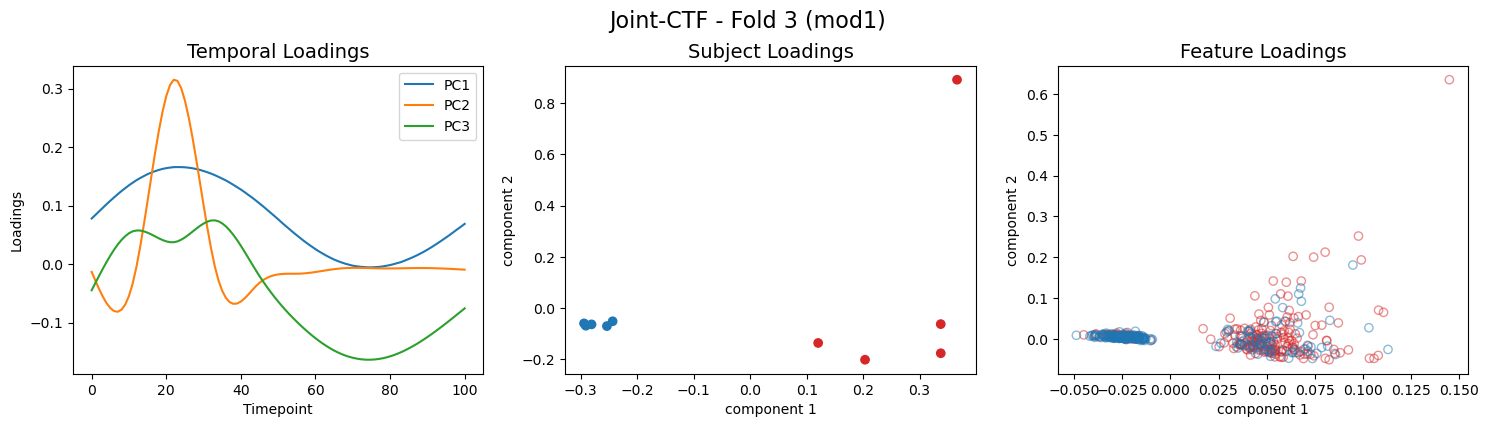

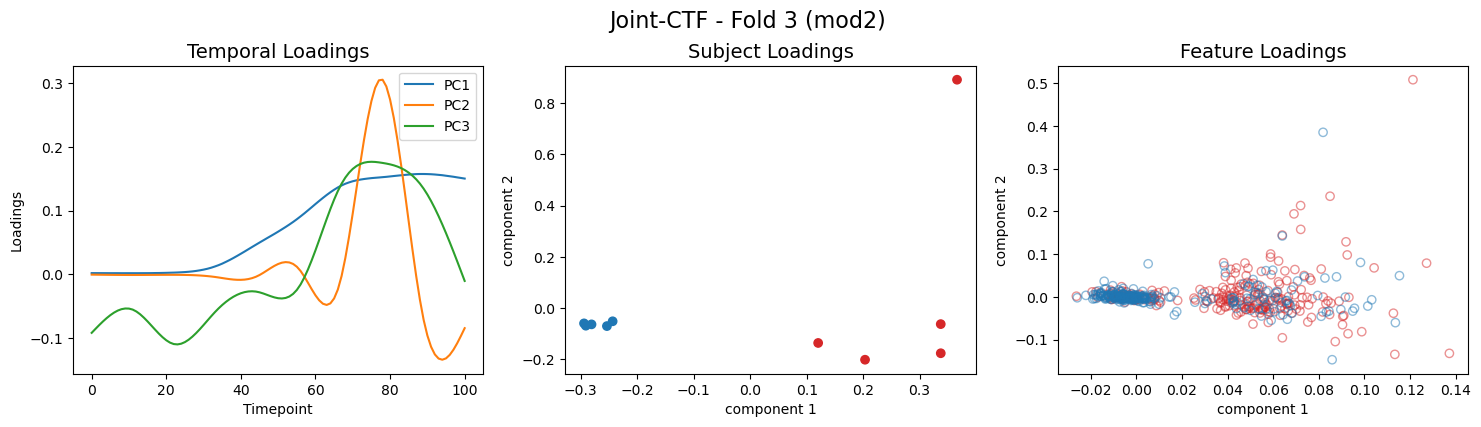

      component_1  component_2  component_3
mod1  3864.339095  1846.829470  1629.007086
mod2  2374.494998   931.870816   860.907619

Subject loadings
[-1.1102230246251565e-16, 4.163336342344337e-17, -4.440892098500626e-16]
[-1.0, 1.0, -1.0]

Feature loadings
[1.0, 1.0, -1.0]
State loadings
[1.0, 1.0, -1.0]

Feature loadings
[1.0, 1.0, 1.0]
State loadings
[1.0, 1.0, 1.0]

Calculate components for component_1
Reached convergence in 6 iterations
Calculate components for component_2
Negative singular values detected (-773). Revising signs.
Reached convergence in 21 iterations
Calculate components for component_3
Negative singular values detected (-1139). Revising signs.
Negative singular values detected (-1505). Revising signs.
Negative singular values detected (-1629). Revising signs.
Negative singular values detected (-1627). Revising signs.
Negative singular values detected (-1625). Revising signs.
Negative singular values detected (-1621). Revising signs.
Negative singular values detec

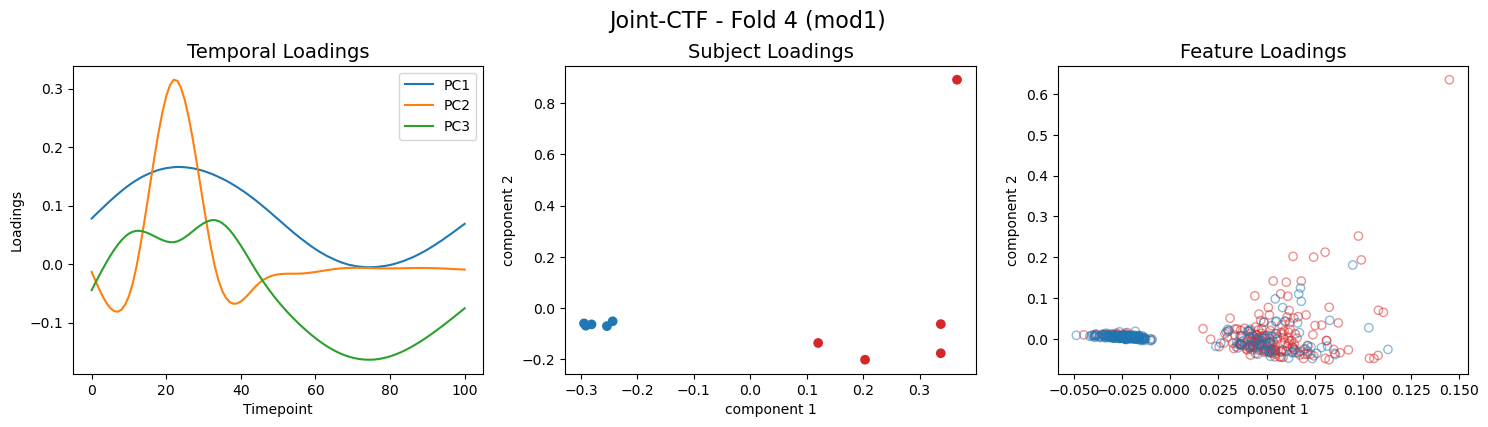

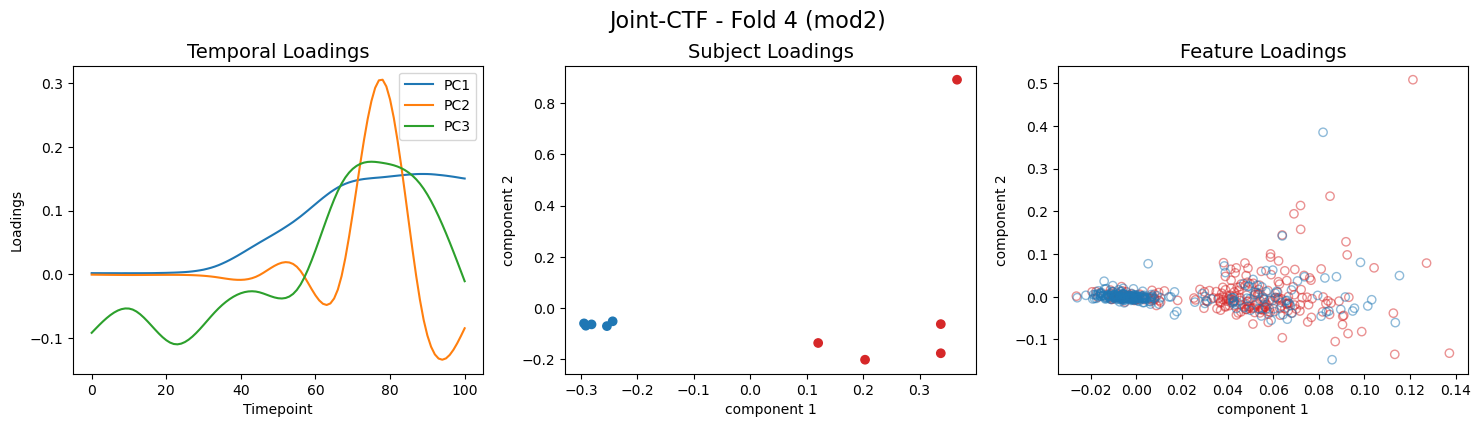

      component_1  component_2  component_3
mod1  3864.781470  1846.872533  1629.501765
mod2  2374.397135   931.830830   860.562459

Subject loadings
[-3.3306690738754696e-16, 8.326672684688674e-17, -1.1102230246251565e-16]
[-1.0, 1.0, -1.0]

Feature loadings
[1.0, 1.0, -1.0]
State loadings
[1.0, 1.0, -1.0]

Feature loadings
[1.0, 1.0, 1.0]
State loadings
[1.0, 1.0, 1.0]

Calculate components for component_1
Reached convergence in 6 iterations
Calculate components for component_2
Negative singular values detected (-774). Revising signs.
Reached convergence in 21 iterations
Calculate components for component_3
Negative singular values detected (-1140). Revising signs.
Negative singular values detected (-1506). Revising signs.
Negative singular values detected (-1628). Revising signs.
Negative singular values detected (-1626). Revising signs.
Negative singular values detected (-1624). Revising signs.
Negative singular values detected (-1619). Revising signs.
Negative singular values dete

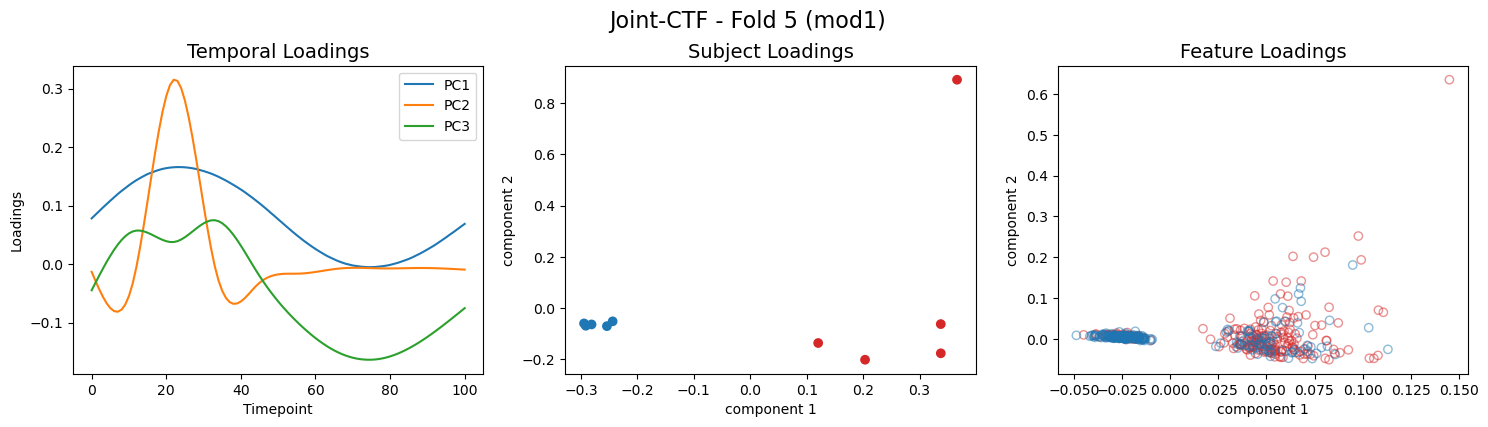

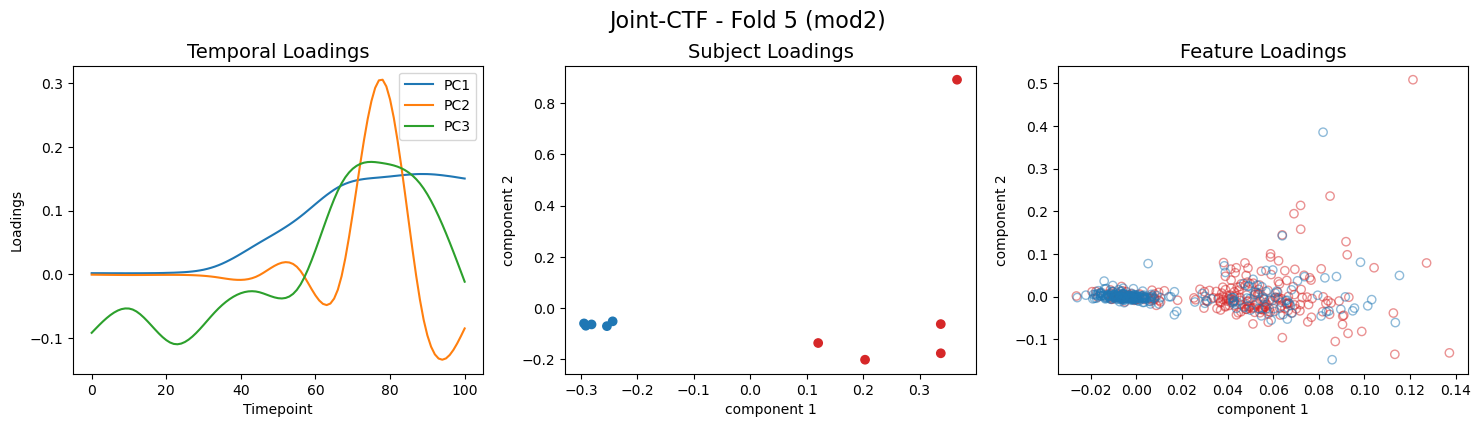

      component_1  component_2  component_3
mod1  3864.275370  1846.909629  1630.016431
mod2  2374.518514   931.680706   859.734325

Subject loadings
[5.551115123125783e-17, -4.163336342344337e-17, 3.885780586188048e-16]
[1.0, -1.0, 1.0]

Feature loadings
[1.0, 1.0, -1.0]
State loadings
[1.0, 1.0, -1.0]

Feature loadings
[1.0, 1.0, 1.0]
State loadings
[1.0, 1.0, 1.0]



In [7]:
# use the same input data 
noisy_mod3_anchor = load_table('noisy_mod3.biom') 
mf_mod3 = pd.read_csv('mf_mod3.csv', index_col=0)
noisy_mod4_anchor = load_table('noisy_mod4.biom')
mf_mod4 = pd.read_csv('mf_mod4.csv', index_col=0)
for i in range(0,5):

    #run joint-ctf
    (subject_loads, feature_loads, state_loads,
    evals, var_explained, feature_covs) = joint_ctf(tables=[noisy_mod3_anchor, noisy_mod4_anchor],
                                                    sample_metadatas=[mf_mod3, mf_mod4],
                                                    modality_ids=['mod1', 'mod2'],
                                                    individual_id_column='ind_id',
                                                    state_column='timepoint')
    
    subject_loads_ = {}
    subject_loads_['mod1'] = subject_loads
    subject_loads_['mod2'] = subject_loads
        

    plot_loadings(loadings=[state_loads, feature_loads, subject_loads_],
              mf=mf_mod3, group_colors=group_colors, title='Joint-CTF - Fold {}'.format(i+1),
              comp1='component_1', comp2='component_2', mod_name='mod1',
              ft_groups=[(0,250),(250,500)], ft_names=['group1','group2'])

    plot_loadings(loadings=[state_loads, feature_loads, subject_loads_],
                mf=mf_mod4, group_colors=group_colors, title='Joint-CTF - Fold {}'.format(i+1),
                comp1='component_1', comp2='component_2', mod_name='mod2',
                ft_groups=[(0,250),(250,500)], ft_names=['group1','group2'])
    
    print(evals)
    print()
    
    #check signs of loadings
    print("Subject loadings")
    print(np.sum(subject_loads[['component_1', 'component_2', 'component_3']]).tolist())
    print(np.sign(np.sum(subject_loads[['component_1', 'component_2', 'component_3']])).tolist())
    print()
    print("Feature loadings")
    print(np.sign(np.sum(feature_loads['mod1'][['component_1', 'component_2', 'component_3']])).tolist())
    print("State loadings")
    print(np.sign(np.sum(state_loads['mod1'][['component_1', 'component_2', 'component_3']])).tolist())
    print()
    print("Feature loadings")
    print(np.sign(np.sum(feature_loads['mod2'][['component_1', 'component_2', 'component_3']])).tolist())
    print("State loadings")
    print(np.sign(np.sum(state_loads['mod2'][['component_1', 'component_2', 'component_3']])).tolist())
    print()

### initial test

In [8]:
#run joint-ctf
(subject_loads, feature_loads, state_loads,
evals, var_explained, feature_covs) = joint_ctf(tables=[noisy_mod3, noisy_mod4],
                                                sample_metadatas=[mf_mod3, mf_mod4],
                                                modality_ids=['mod1', 'mod2'],
                                                individual_id_column='ind_id',
                                                state_column='timepoint')

Calculate components for component_1
Reached convergence in 6 iterations
Calculate components for component_2
Reached convergence in 21 iterations
Calculate components for component_3
Reached convergence in 12 iterations
mod1 ksi-hat: [ 1.  1. -1.]
mod2 ksi-hat: [1. 1. 1.]
mod1 b-hat: [-1.  1.  1.]
original a-hat: [-1. -1.  1.]
a-hat: [ 1. -1.  1.]
mod2 b-hat: [-1.  1.  1.]
Corrected b-hat: [-1.  1.  1.]


In [10]:
# plot_loadings_v2(loadings=[state_loads,  subject_loads],
#                  mf=mf_mod3, group_colors=group_colors,
#                  comp1='component_1', comp2='component_2', mod_name='mod1')
# plot_loadings_v2(loadings=[state_loads, subject_loads],
#                  mf=mf_mod4, group_colors=group_colors,
#                  comp1='component_1', comp2='component_2', mod_name='mod2')


In [11]:
subject_loads_ = {}
subject_loads_['mod1'] = subject_loads
subject_loads_['mod2'] = subject_loads

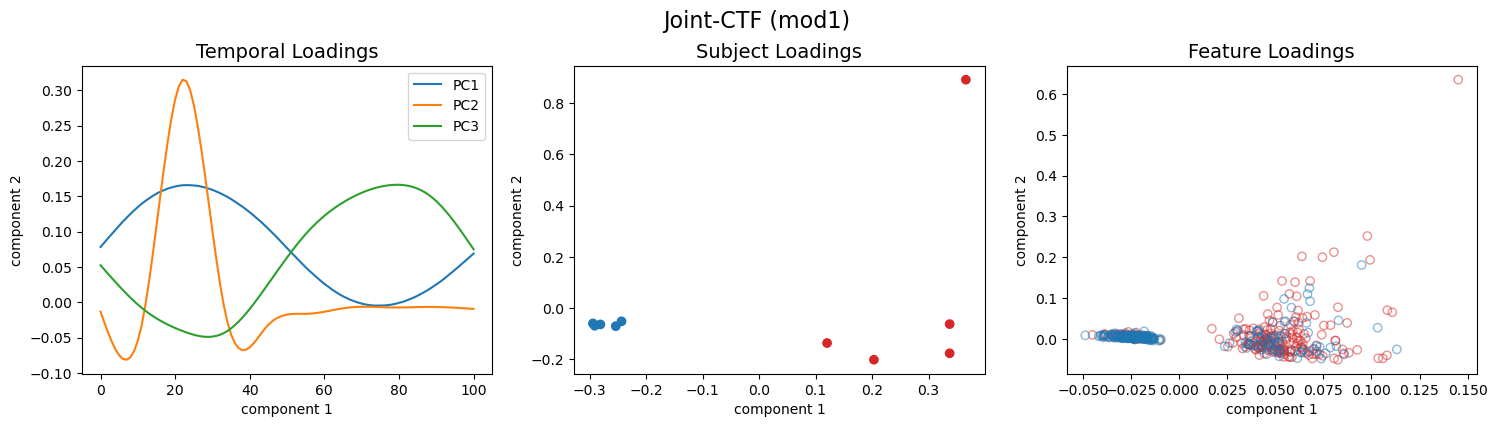

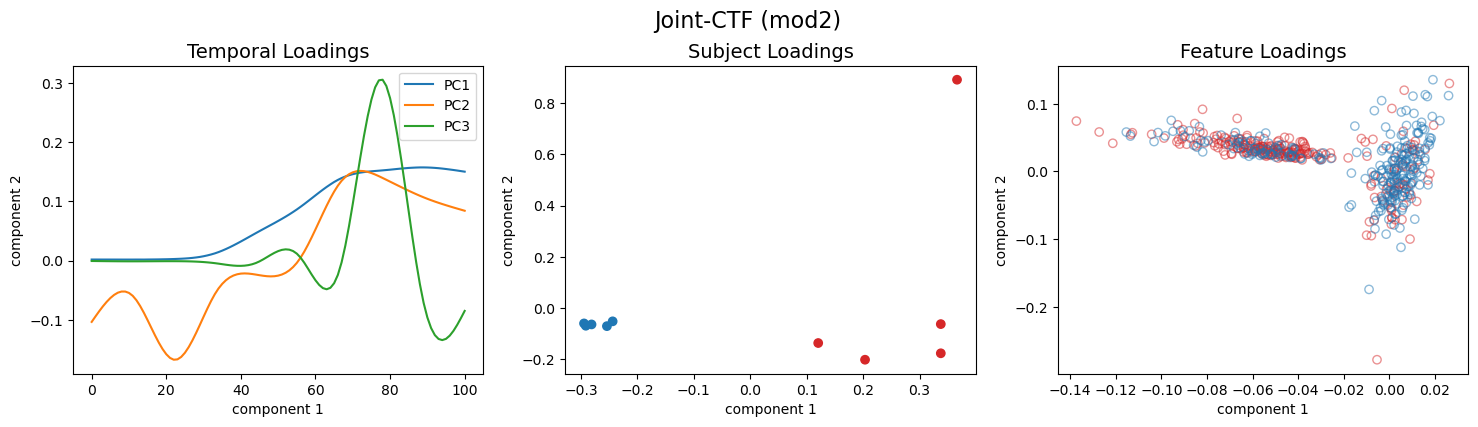

In [12]:
plot_loadings(loadings=[state_loads, feature_loads, subject_loads],
              mf=mf_mod3, group_colors=group_colors, title='Joint-CTF',
              comp1='component_1', comp2='component_2', mod_name='mod1',
              ft_groups=[(0,250),(250,500)], ft_names=['group1','group2'])

plot_loadings(loadings=[state_loads, feature_loads, subject_loads],
              mf=mf_mod4, group_colors=group_colors, title='Joint-CTF',
              comp1='component_1', comp2='component_2', mod_name='mod2',
              ft_groups=[(0,250),(250,500)], ft_names=['group1','group2'])

In [13]:
# display(subject_loads_['mod1'].head())
# display(subject_loads_['mod2'].head())

In [14]:
test_mod1 = feature_loads['mod1'][['component_1', 'component_2', 'component_3']]
test_mod2 = feature_loads['mod2'][['component_1', 'component_2', 'component_3']]

sgn_mod1 = np.sign(test_mod1.sum(axis=0))
sgn_mod2 = np.sign(test_mod2.sum(axis=0))
print(sgn_mod1)
print(sgn_mod2)

component_1    1.0
component_2    1.0
component_3    1.0
dtype: float64
component_1   -1.0
component_2    1.0
component_3    1.0
dtype: float64


In [15]:
test_mod1 = state_loads['mod1'][['component_1', 'component_2', 'component_3']]
test_mod2 = state_loads['mod2'][['component_1', 'component_2', 'component_3']]

sgn_mod1 = np.sign(test_mod1.sum(axis=0))
sgn_mod2 = np.sign(test_mod2.sum(axis=0))
print(sgn_mod1)
print(sgn_mod2)

component_1    1.0
component_2    1.0
component_3    1.0
dtype: float64
component_1    1.0
component_2    1.0
component_3    1.0
dtype: float64


In [16]:
#test_ = test_*sgn_feature_loadings
#test_

### Without Summation Check

Calculate components for component_1
Reached convergence in 6 iterations
Calculate components for component_2
Reached convergence in 19 iterations
Calculate components for component_3
Reached convergence in 21 iterations


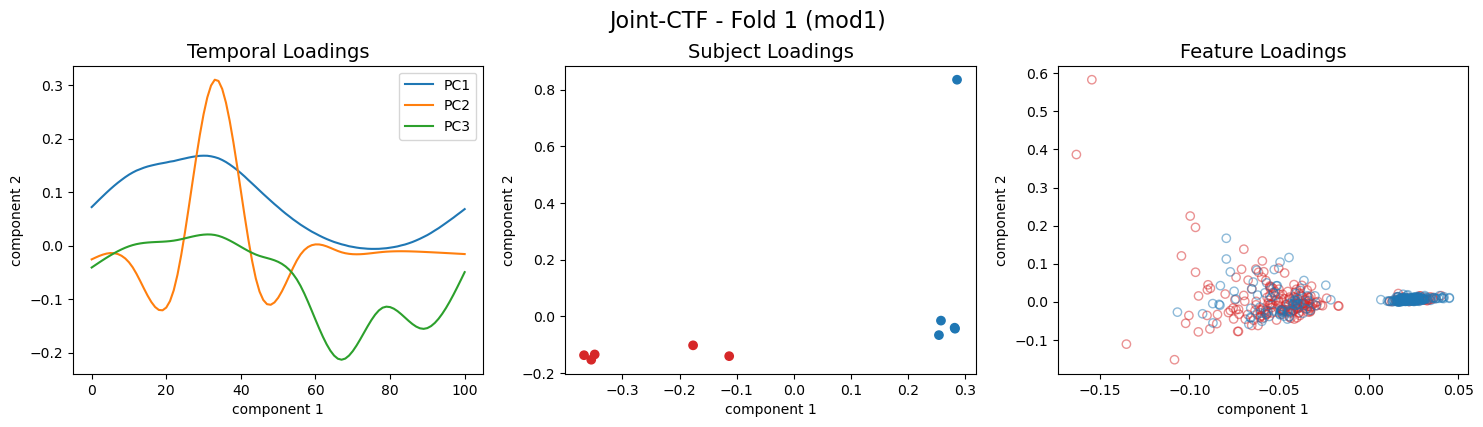

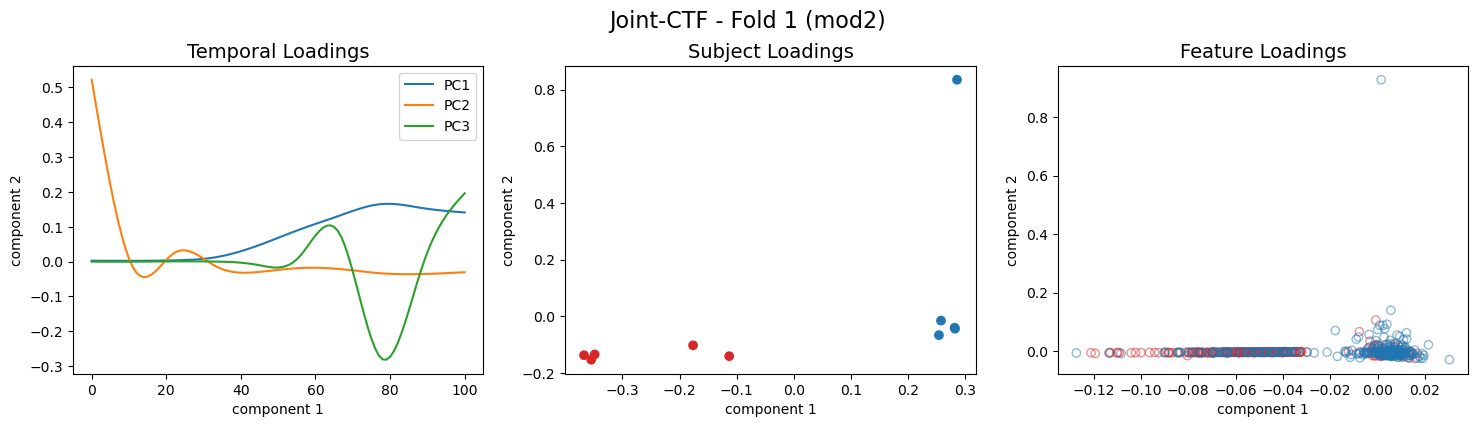

Calculate components for component_1
Reached convergence in 6 iterations
Calculate components for component_2
Reached convergence in 21 iterations
Calculate components for component_3
Reached convergence in 16 iterations


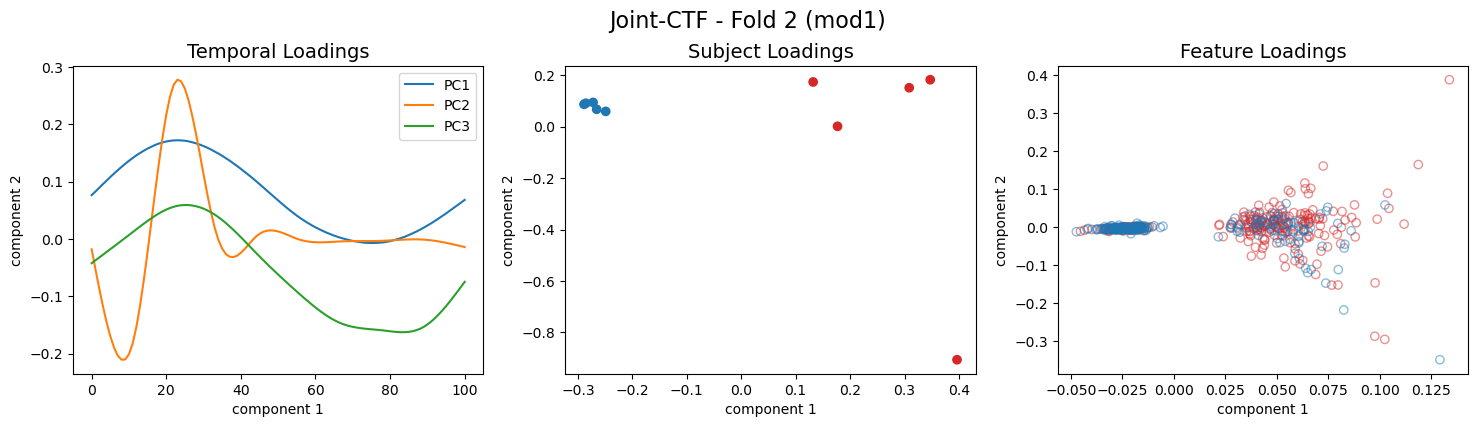

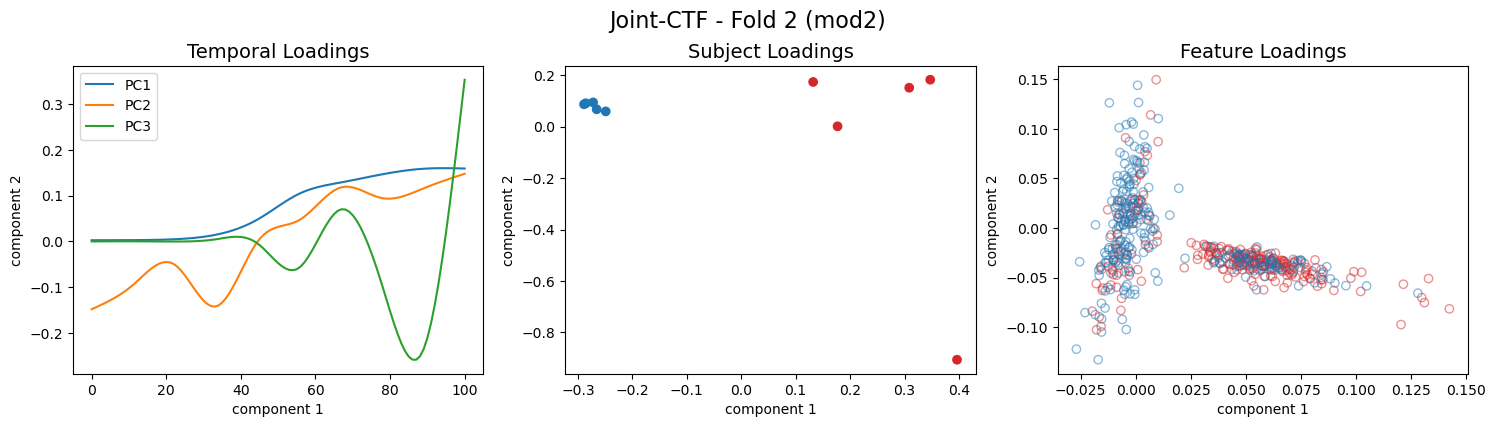

Calculate components for component_1
Reached convergence in 6 iterations
Calculate components for component_2
Reached convergence in 11 iterations
Calculate components for component_3
Reached convergence in 12 iterations


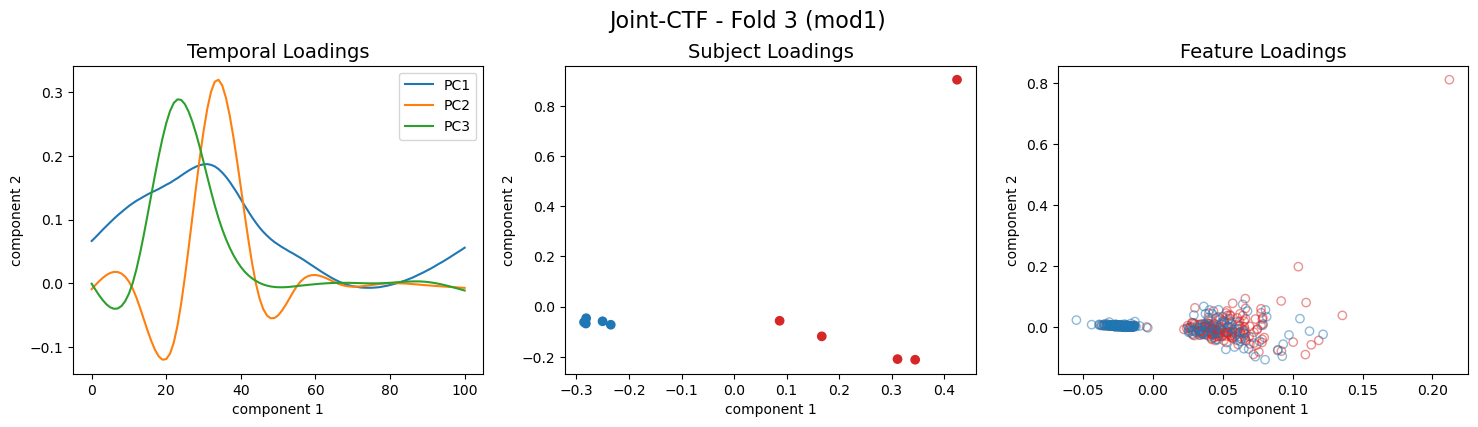

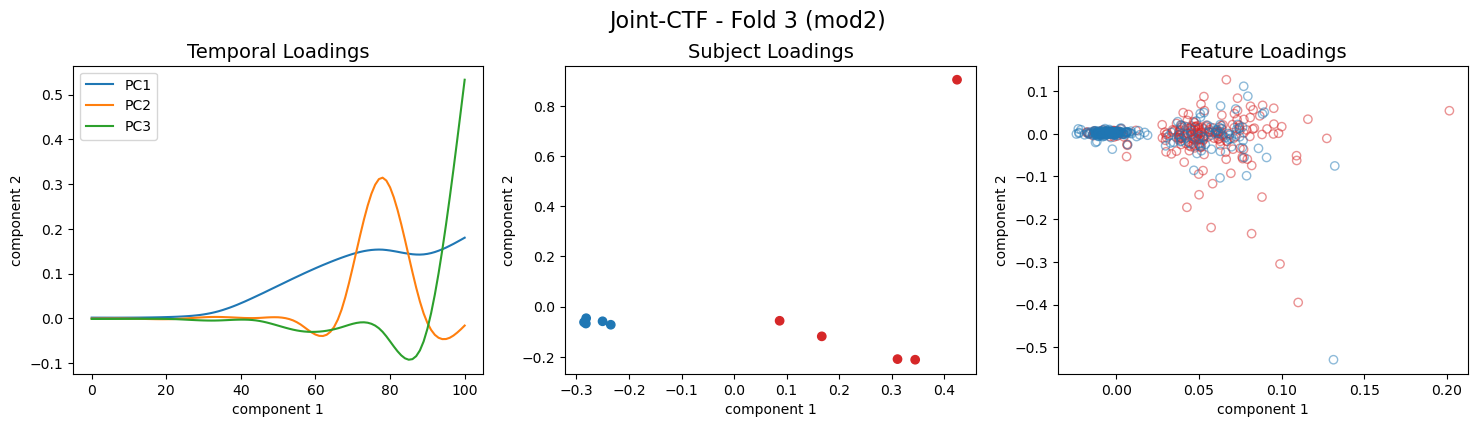

Calculate components for component_1
Reached convergence in 7 iterations
Calculate components for component_2
Reached convergence in 13 iterations
Calculate components for component_3
Reached convergence in 21 iterations


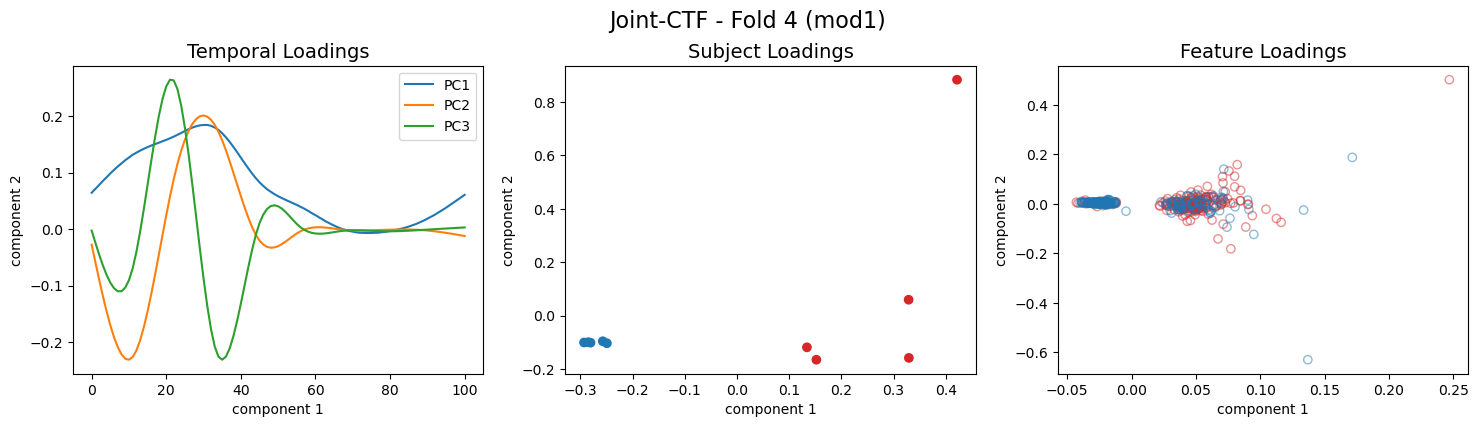

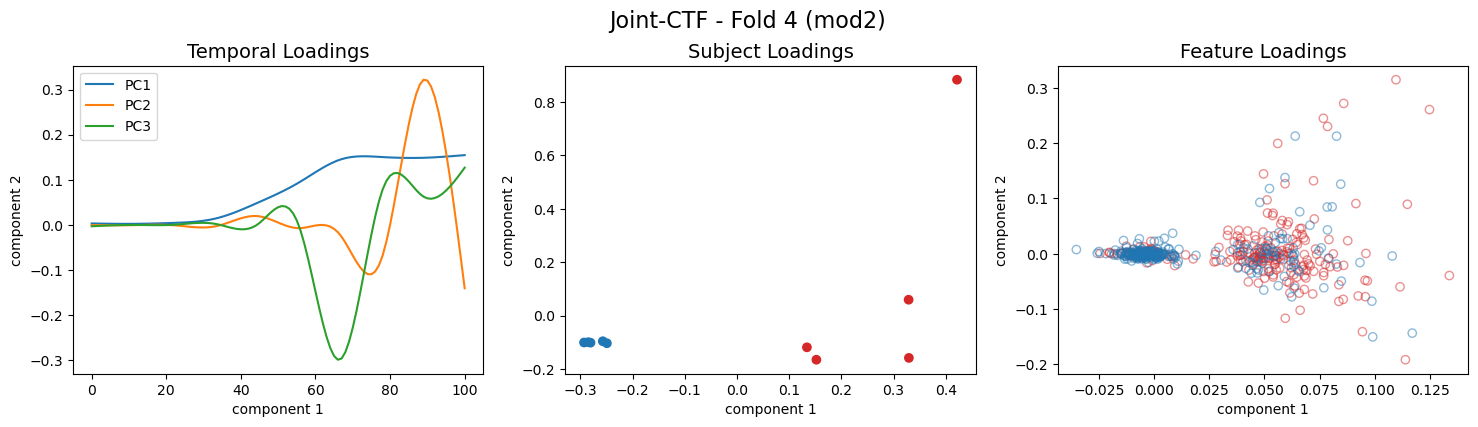

Calculate components for component_1
Reached convergence in 6 iterations
Calculate components for component_2
Reached convergence in 11 iterations
Calculate components for component_3
Reached convergence in 13 iterations


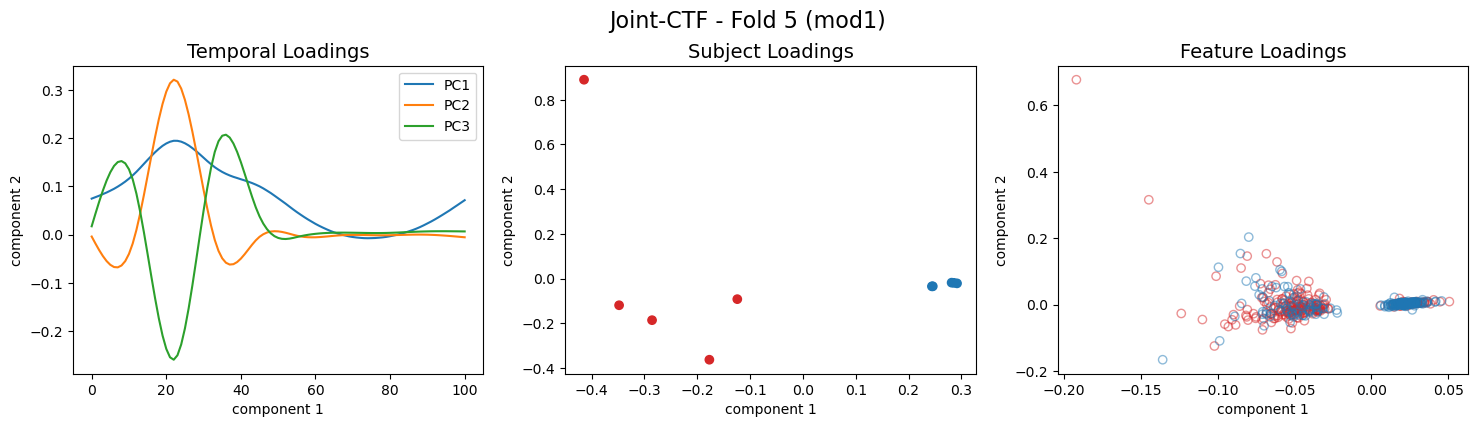

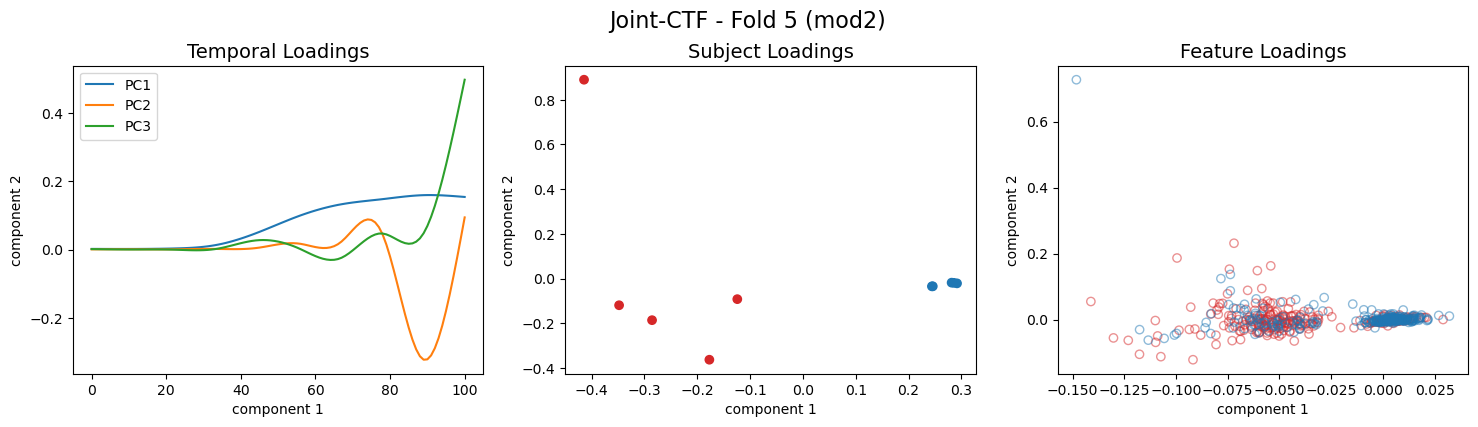

Calculate components for component_1
Reached convergence in 6 iterations
Calculate components for component_2
Reached convergence in 11 iterations
Calculate components for component_3
Reached convergence in 12 iterations


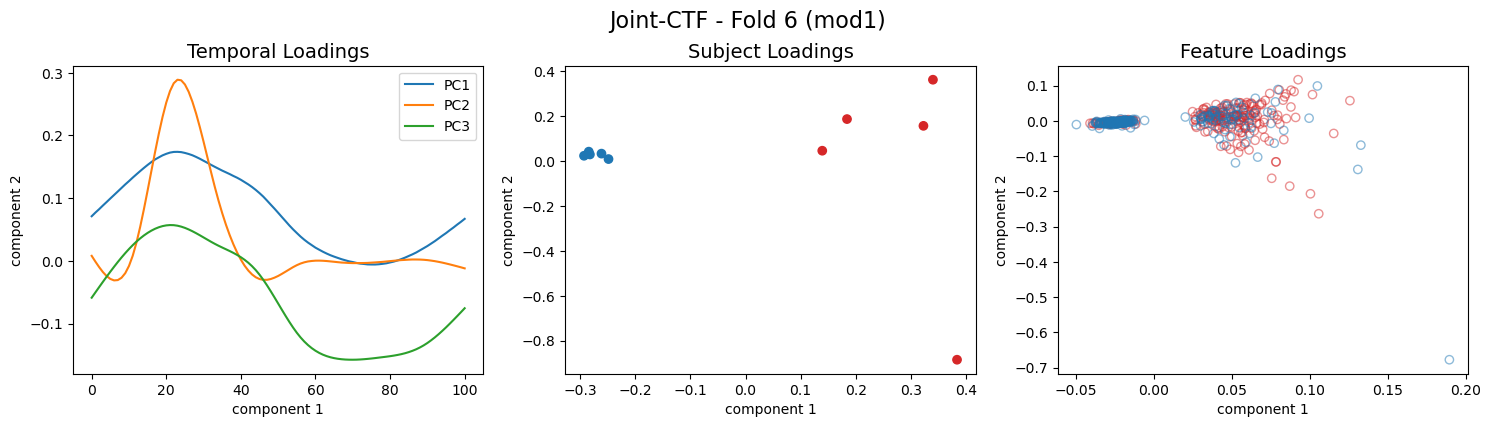

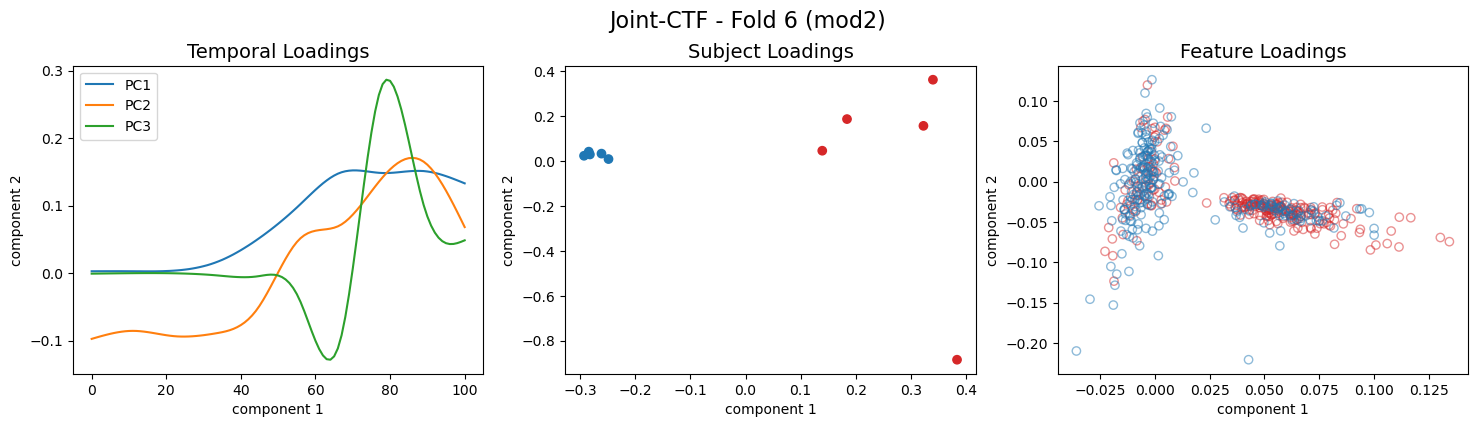

Calculate components for component_1
Reached convergence in 6 iterations
Calculate components for component_2
Reached convergence in 21 iterations
Calculate components for component_3
Reached convergence in 21 iterations


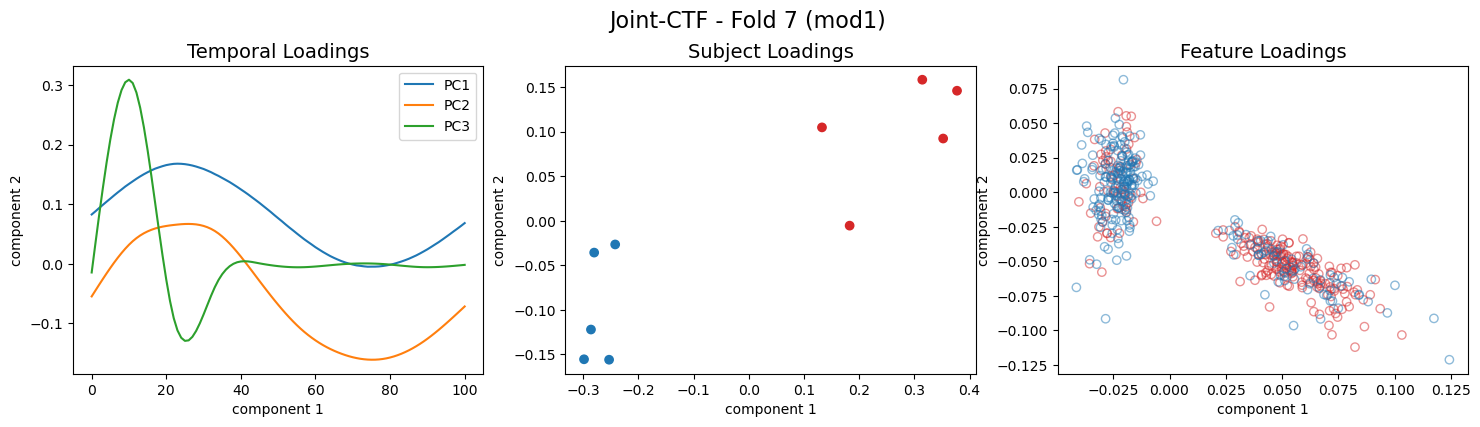

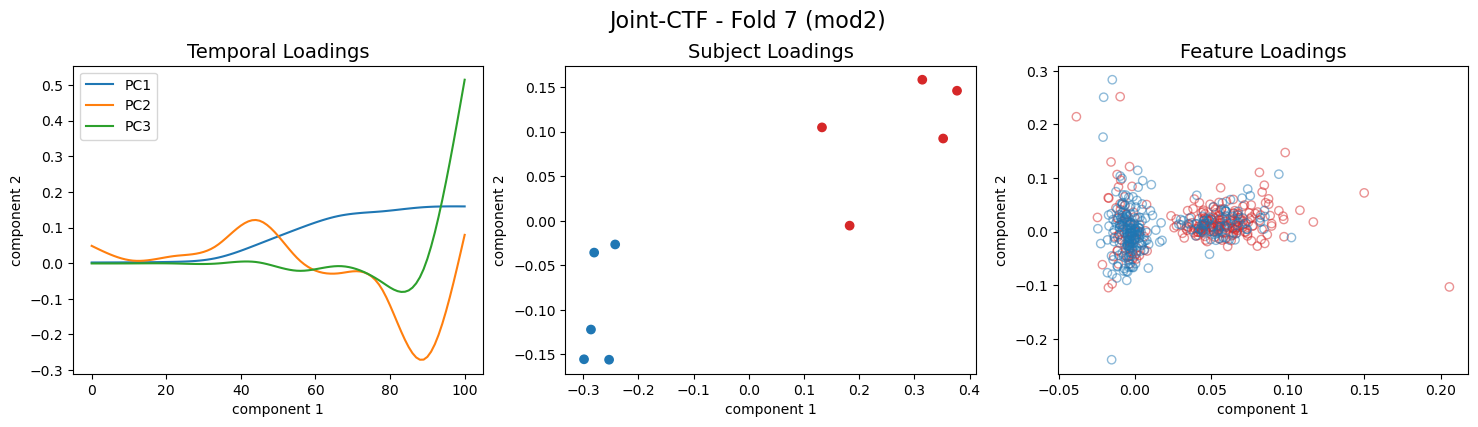

Calculate components for component_1
Reached convergence in 6 iterations
Calculate components for component_2
Reached convergence in 18 iterations
Calculate components for component_3
Reached convergence in 21 iterations


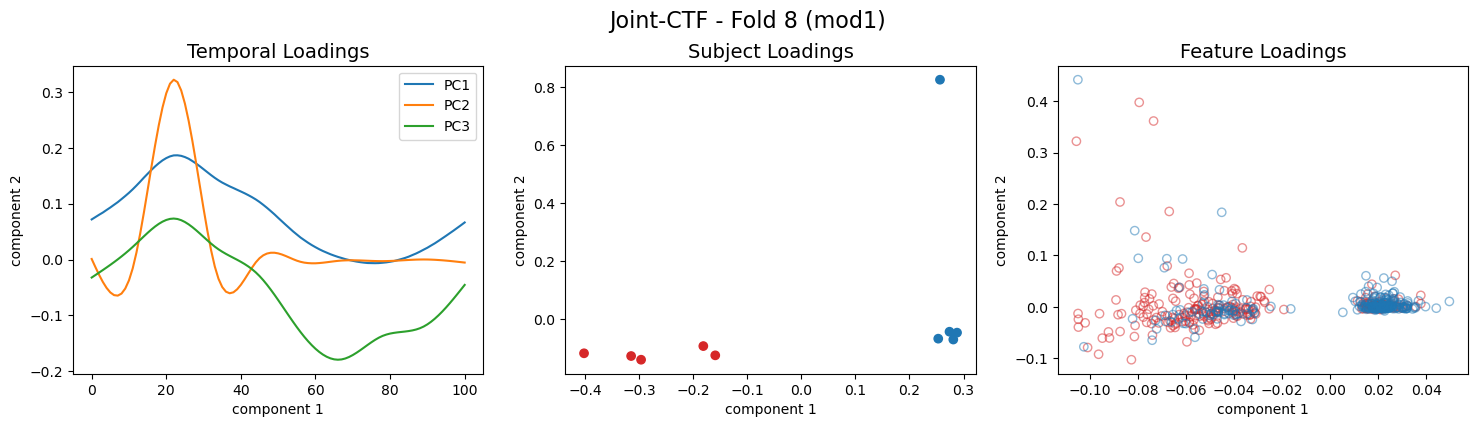

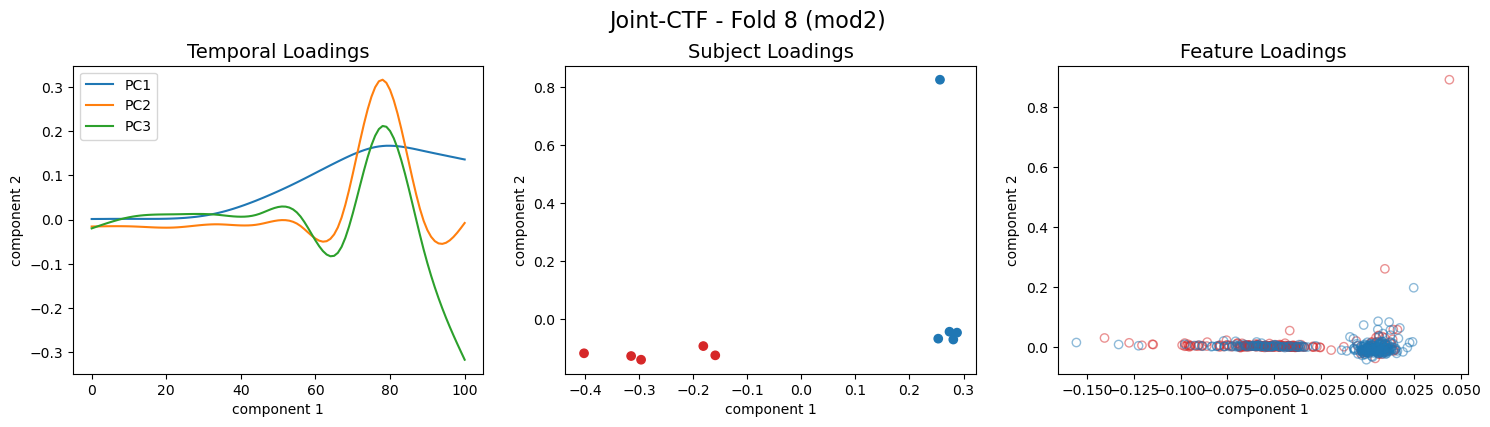

Calculate components for component_1
Reached convergence in 7 iterations
Calculate components for component_2
Reached convergence in 13 iterations
Calculate components for component_3
Reached convergence in 10 iterations


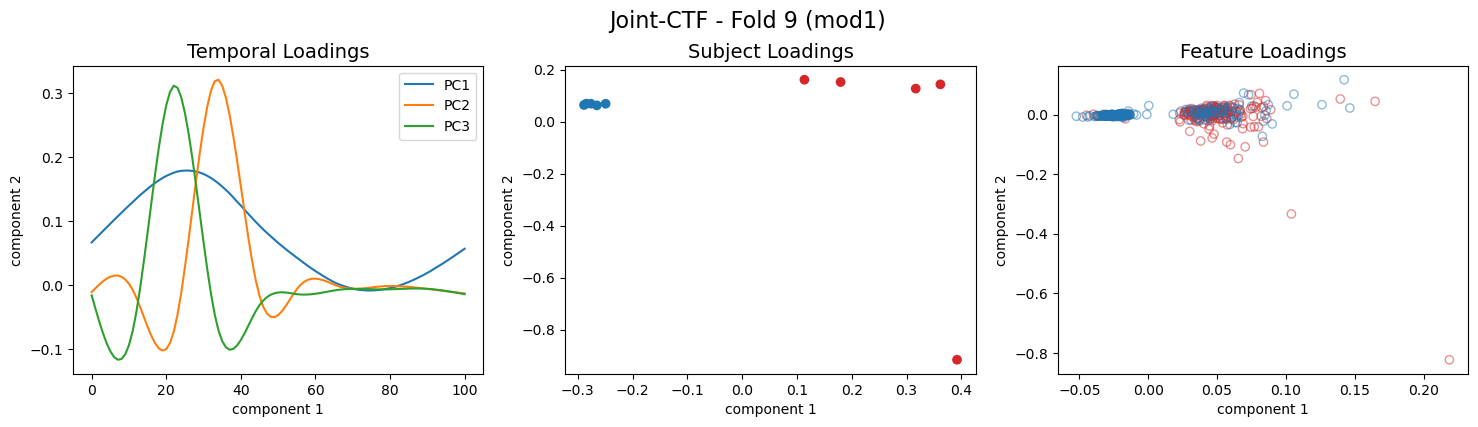

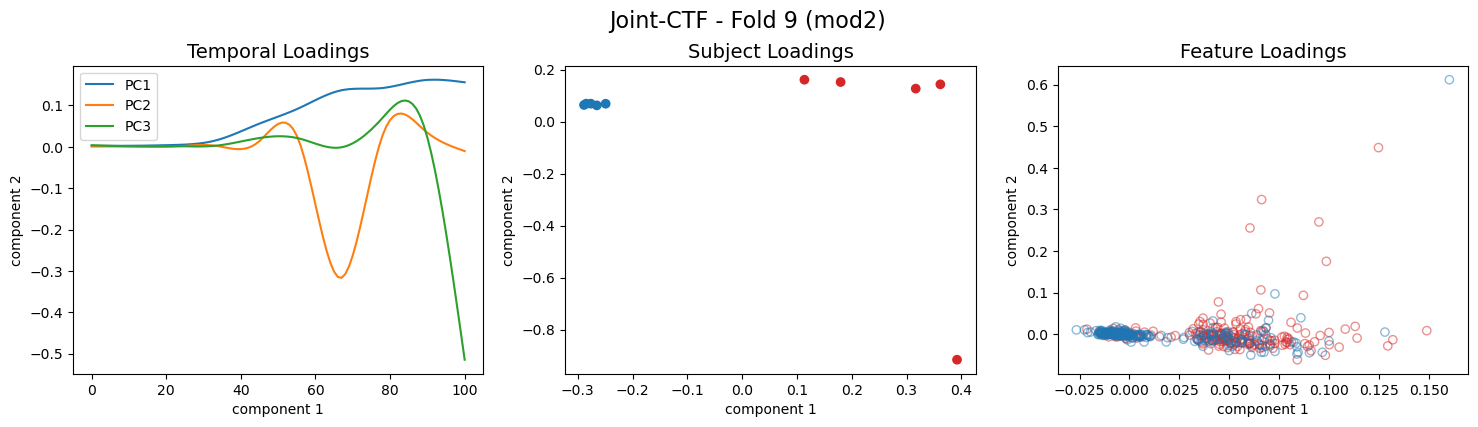

Calculate components for component_1
Reached convergence in 6 iterations
Calculate components for component_2
Reached convergence in 16 iterations
Calculate components for component_3
Reached convergence in 21 iterations


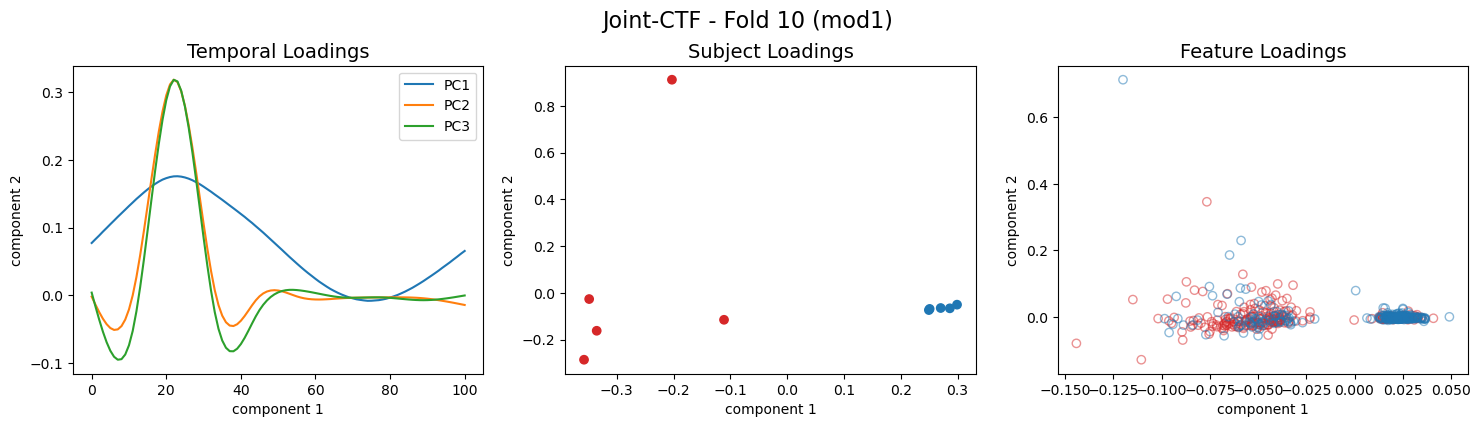

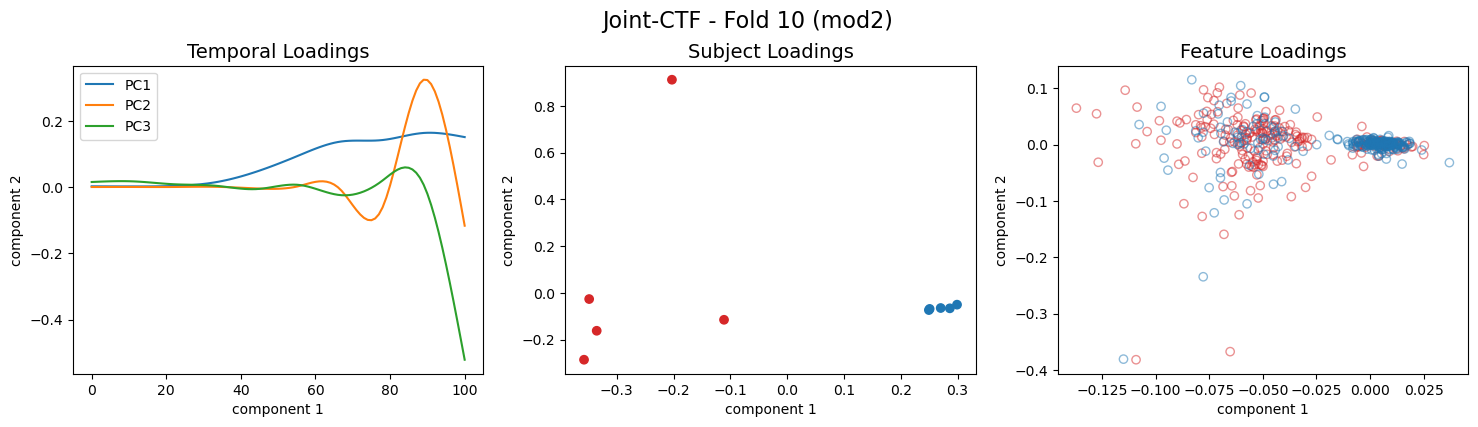

In [4]:
for i in range(0,10):
    _, _, noisy_mod3, mf_mod3 = create_sim_data('mod1', n_timepoints=10, n_subjects=10, 
                                            num_samples=100, num_features=500,
                                            rank=2, C_=2e3, spar=2e3,
                                            fxs=[sine_func], f_intervals=[[(0,250)]],
                                            s_intervals=[[(0,100)]], plotting=False,
                                            col_handle='individual')

    _, _, noisy_mod4, mf_mod4 = create_sim_data('mod2', n_timepoints=10, n_subjects=10, 
                                                num_samples=100, num_features=500,
                                                rank=2, C_=2e3, spar=2e3,
                                                fxs=[sigmoid], f_intervals=[[(0,250)]],
                                                s_intervals=[[(0,100)]], plotting=False,
                                                col_handle='individual')
    
    #run joint-ctf
    (subject_loads, feature_loads, state_loads,
    evals, var_explained, feature_covs) = joint_ctf(tables=[noisy_mod3, noisy_mod4],
                                                    sample_metadatas=[mf_mod3, mf_mod4],
                                                    modality_ids=['mod1', 'mod2'],
                                                    individual_id_column='ind_id',
                                                    state_column='timepoint')
    
    subject_loads_ = {}
    subject_loads_['mod1'] = subject_loads
    subject_loads_['mod2'] = subject_loads
        

    plot_loadings(loadings=[state_loads, feature_loads, subject_loads_],
              mf=mf_mod3, group_colors=group_colors, title='Joint-CTF - Fold {}'.format(i+1),
              comp1='component_1', comp2='component_2', mod_name='mod1',
              ft_groups=[(0,250),(250,500)], ft_names=['group1','group2'])

    plot_loadings(loadings=[state_loads, feature_loads, subject_loads_],
                mf=mf_mod4, group_colors=group_colors, title='Joint-CTF - Fold {}'.format(i+1),
                comp1='component_1', comp2='component_2', mod_name='mod2',
                ft_groups=[(0,250),(250,500)], ft_names=['group1','group2'])

### With Summation Check

Calculate components for component_1
Reached convergence in 6 iterations
Calculate components for component_2
Reached convergence in 20 iterations
Calculate components for component_3
Reached convergence in 9 iterations


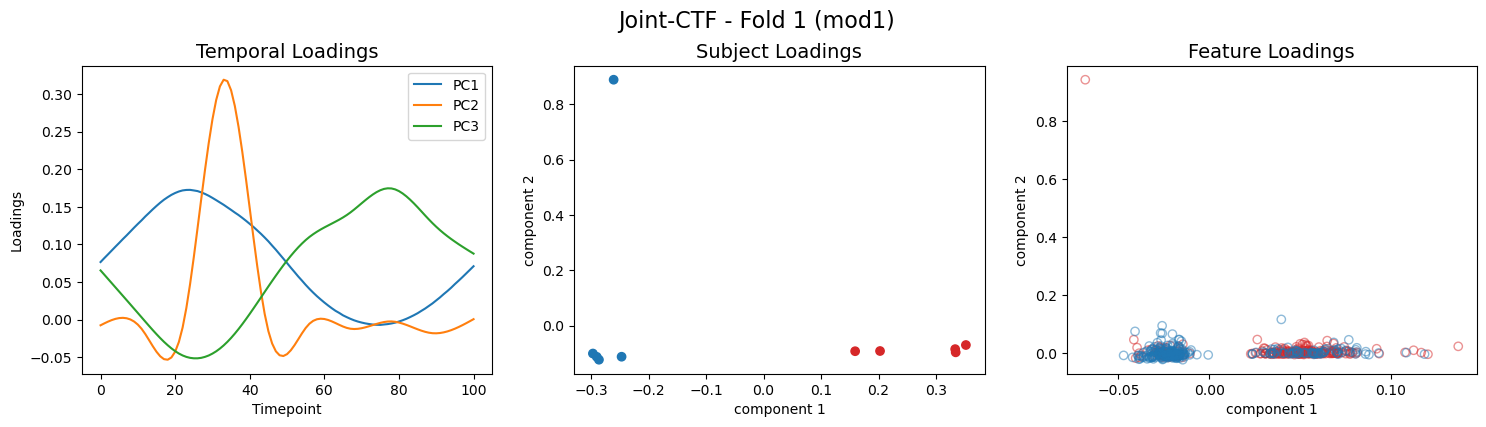

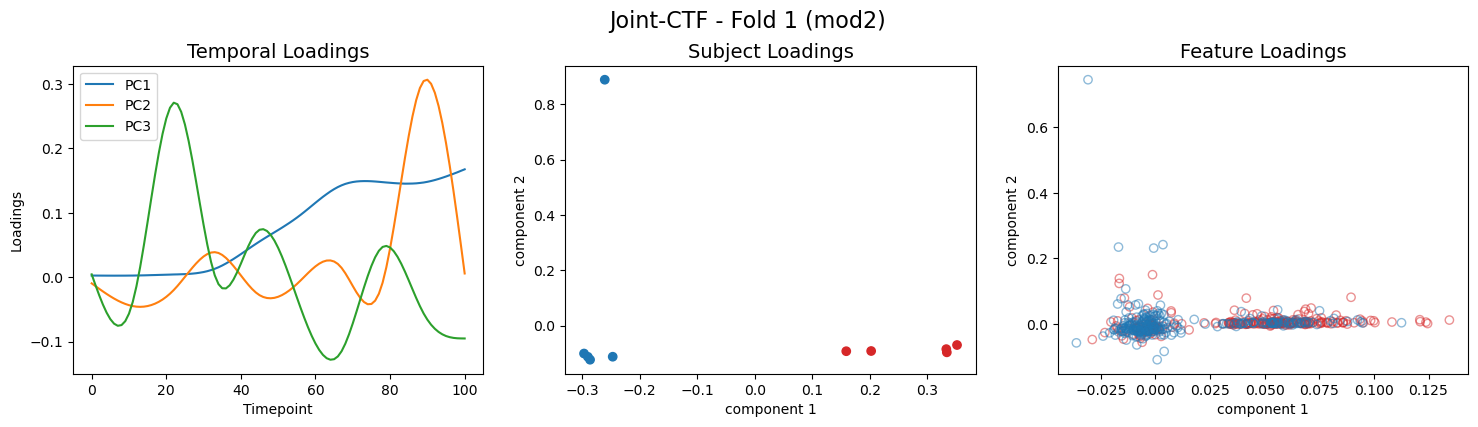

Calculate components for component_1
Reached convergence in 7 iterations
Calculate components for component_2
Reached convergence in 11 iterations
Calculate components for component_3
Reached convergence in 12 iterations


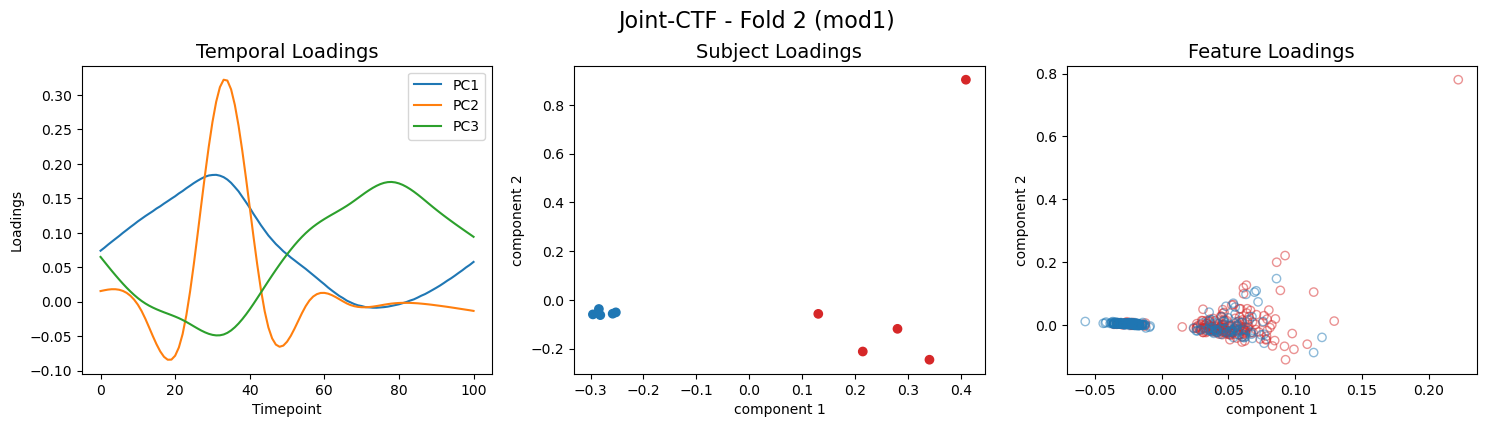

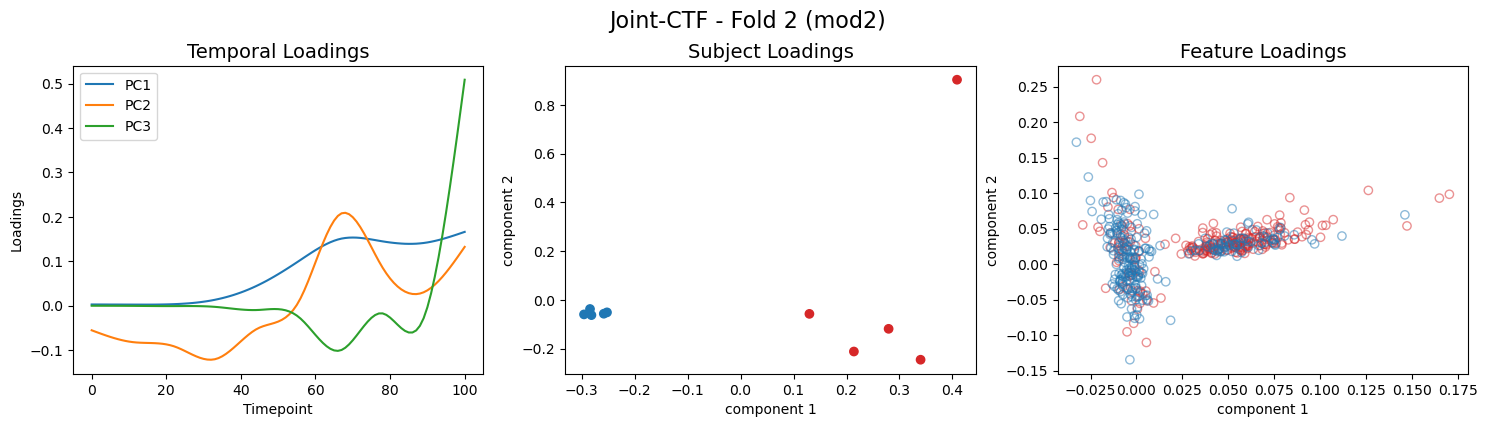

Calculate components for component_1
Reached convergence in 6 iterations
Calculate components for component_2
Reached convergence in 16 iterations
Calculate components for component_3
Reached convergence in 21 iterations


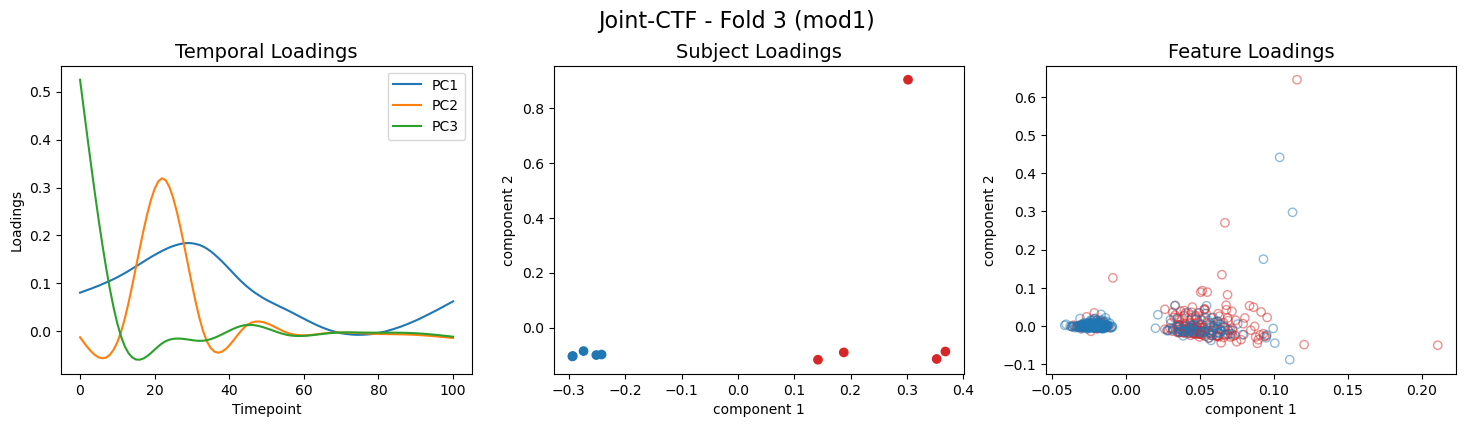

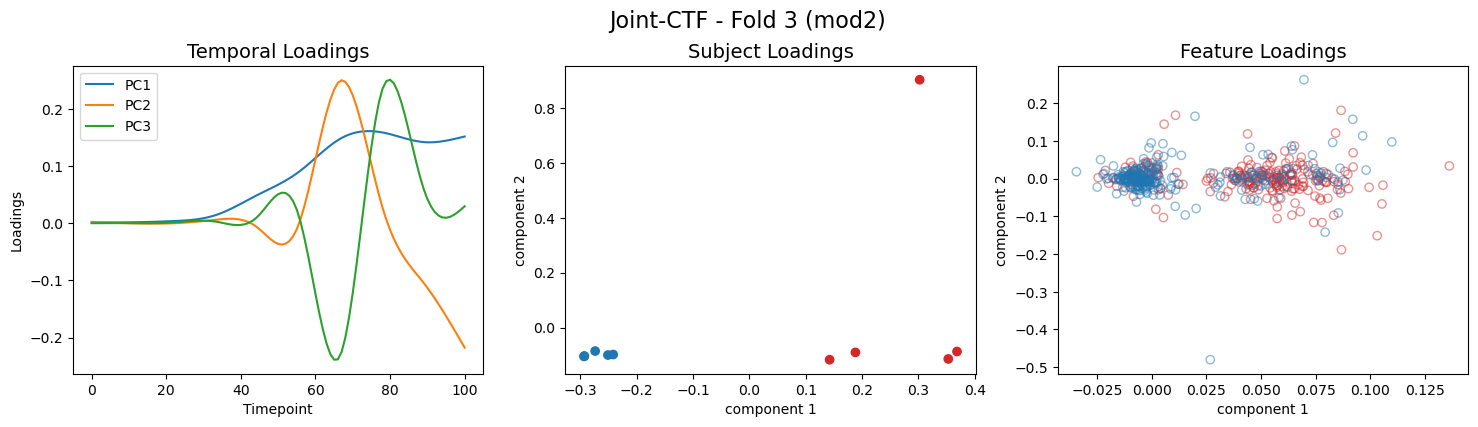

Calculate components for component_1
Reached convergence in 6 iterations
Calculate components for component_2
Reached convergence in 21 iterations
Calculate components for component_3
Reached convergence in 10 iterations


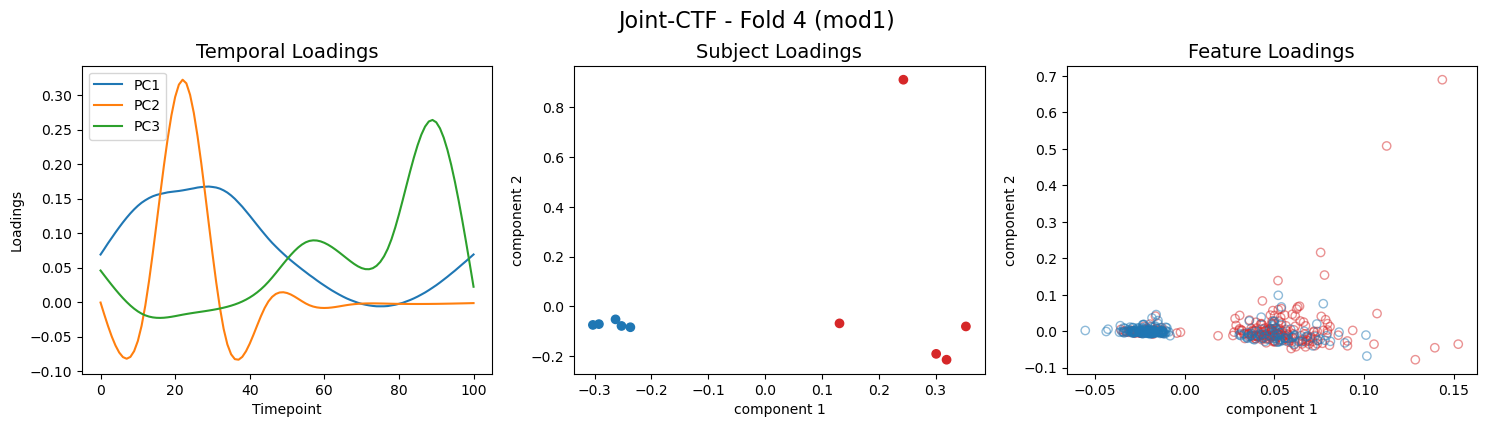

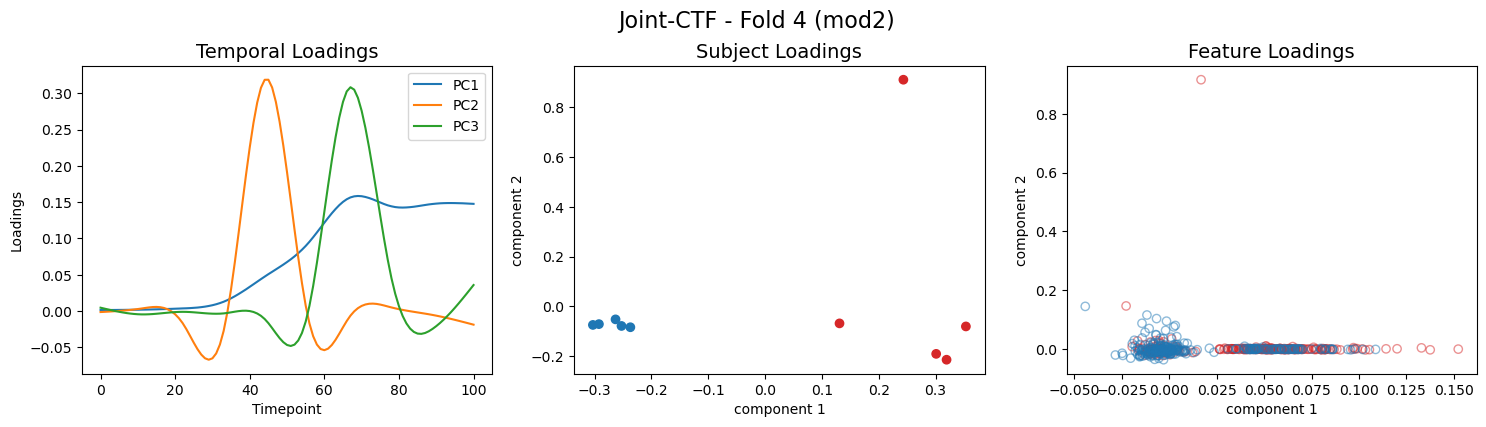

Calculate components for component_1
Reached convergence in 6 iterations
Calculate components for component_2
Reached convergence in 8 iterations
Calculate components for component_3
Reached convergence in 21 iterations


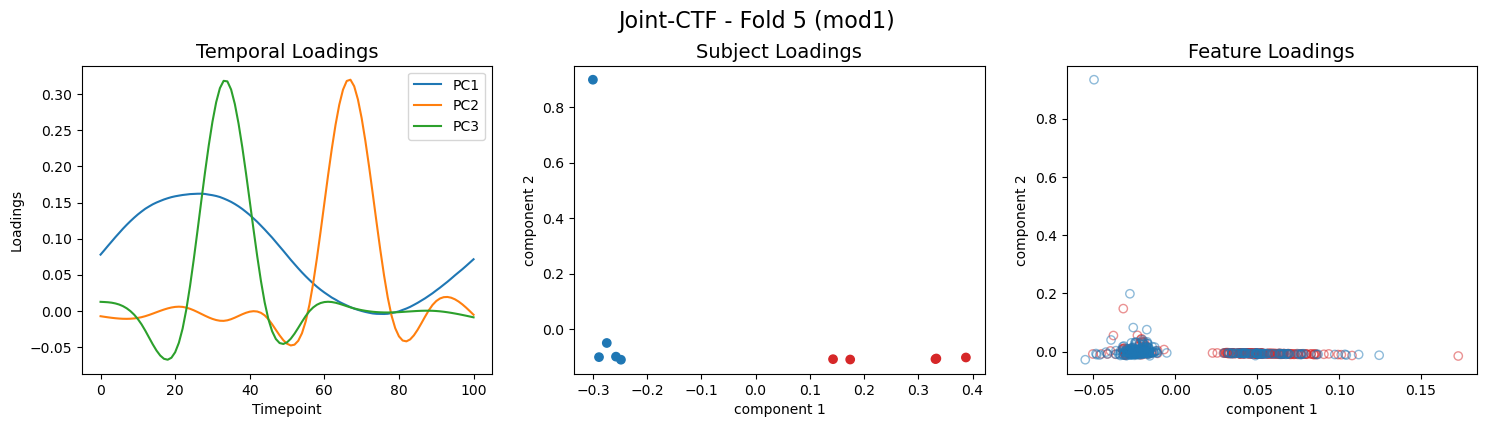

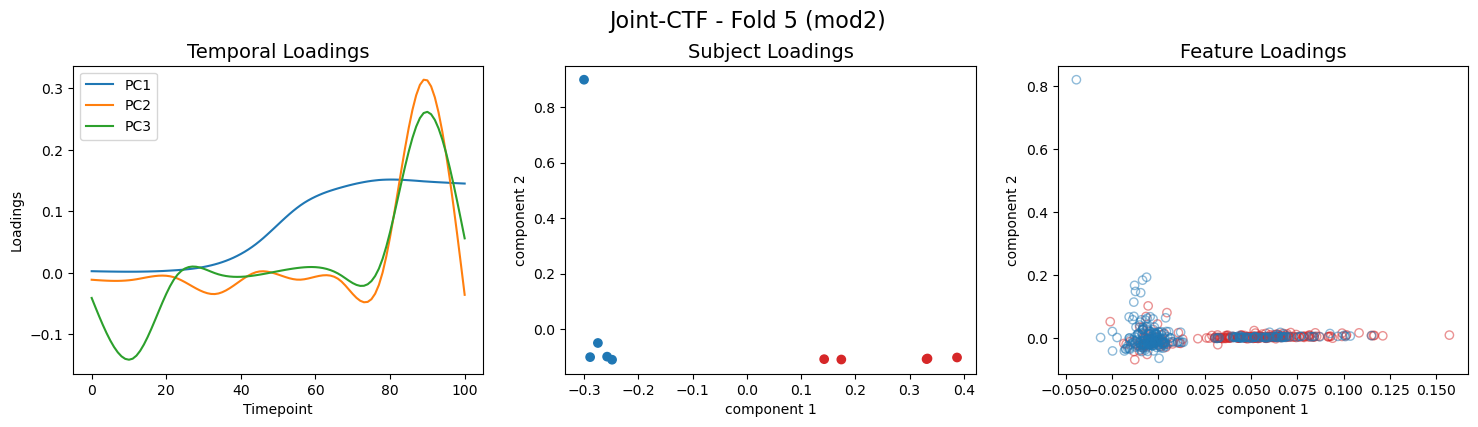

Calculate components for component_1
Reached convergence in 6 iterations
Calculate components for component_2
Reached convergence in 21 iterations
Calculate components for component_3
Reached convergence in 21 iterations


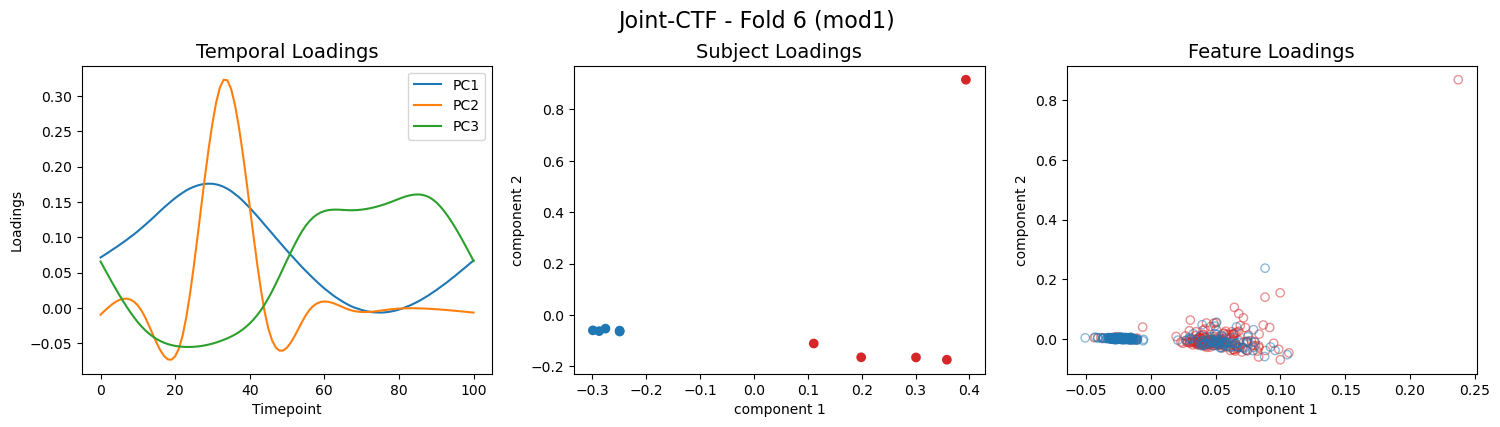

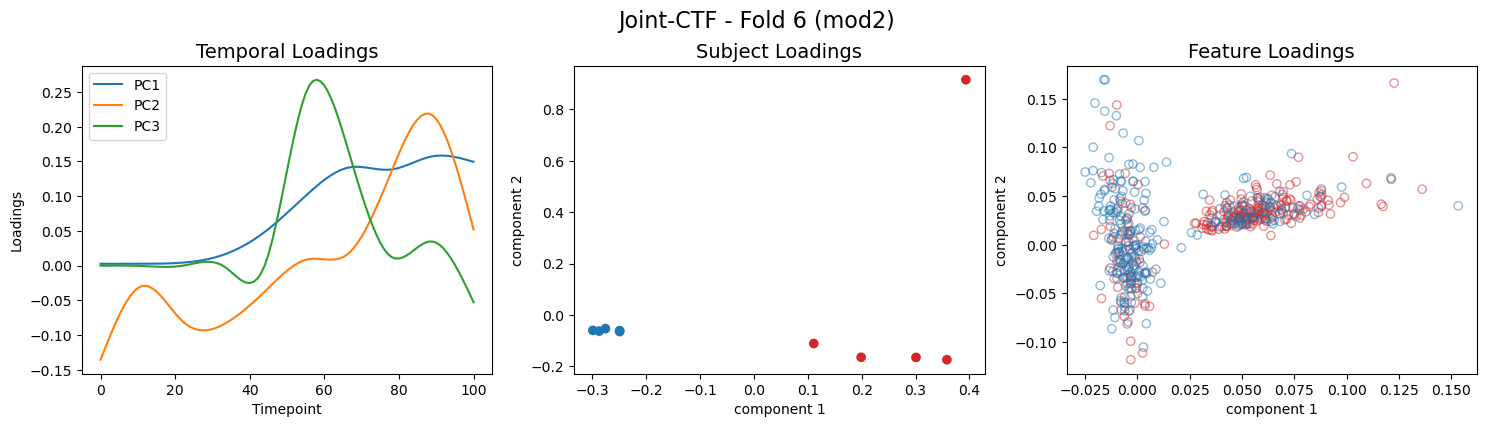

Calculate components for component_1
Reached convergence in 7 iterations
Calculate components for component_2
Reached convergence in 13 iterations
Calculate components for component_3
Reached convergence in 21 iterations


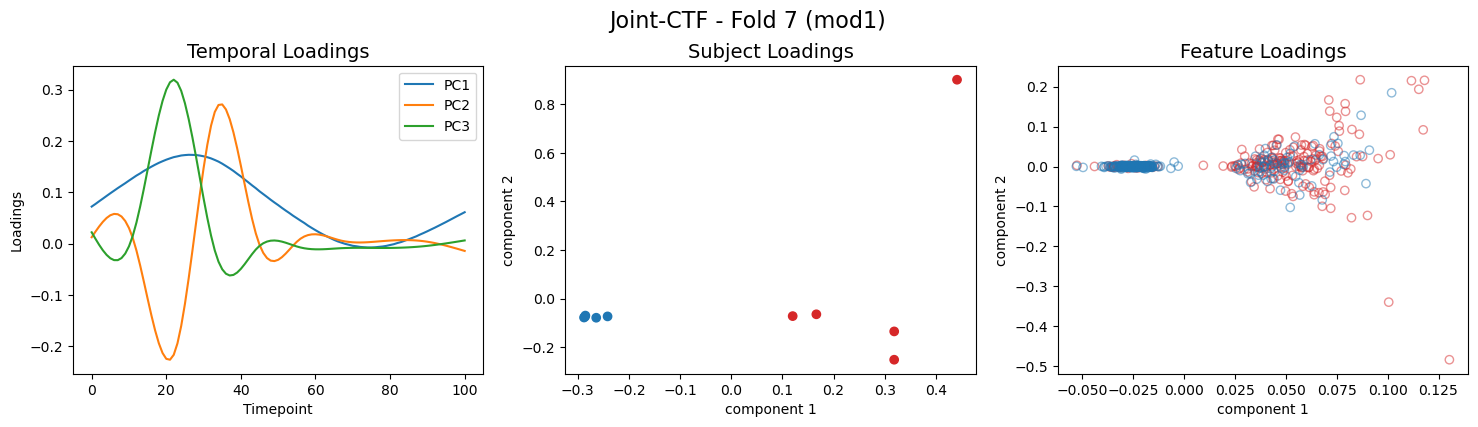

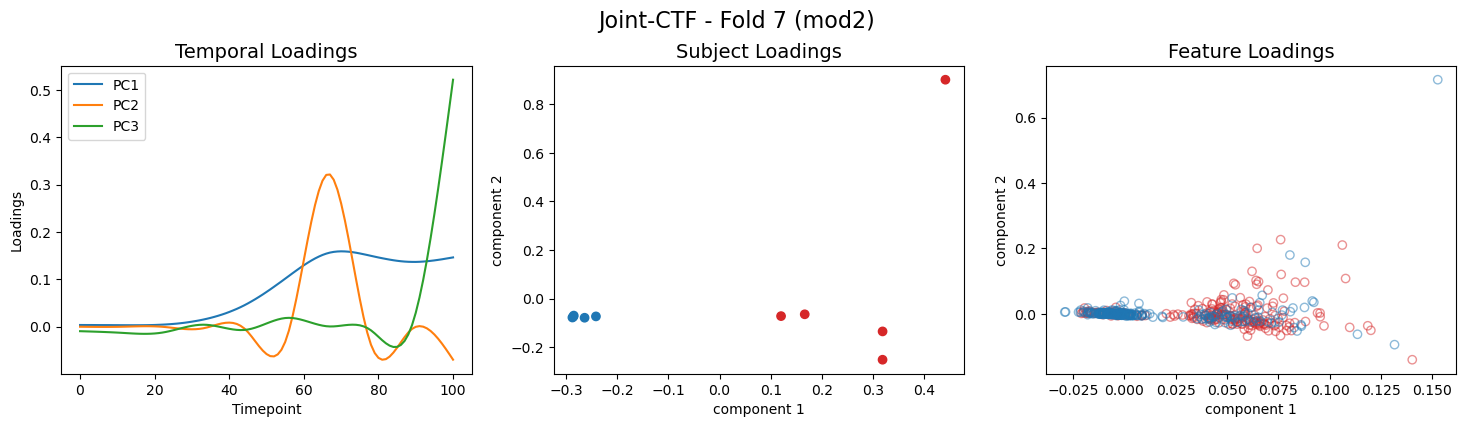

Calculate components for component_1
Reached convergence in 6 iterations
Calculate components for component_2
Reached convergence in 9 iterations
Calculate components for component_3
Reached convergence in 10 iterations


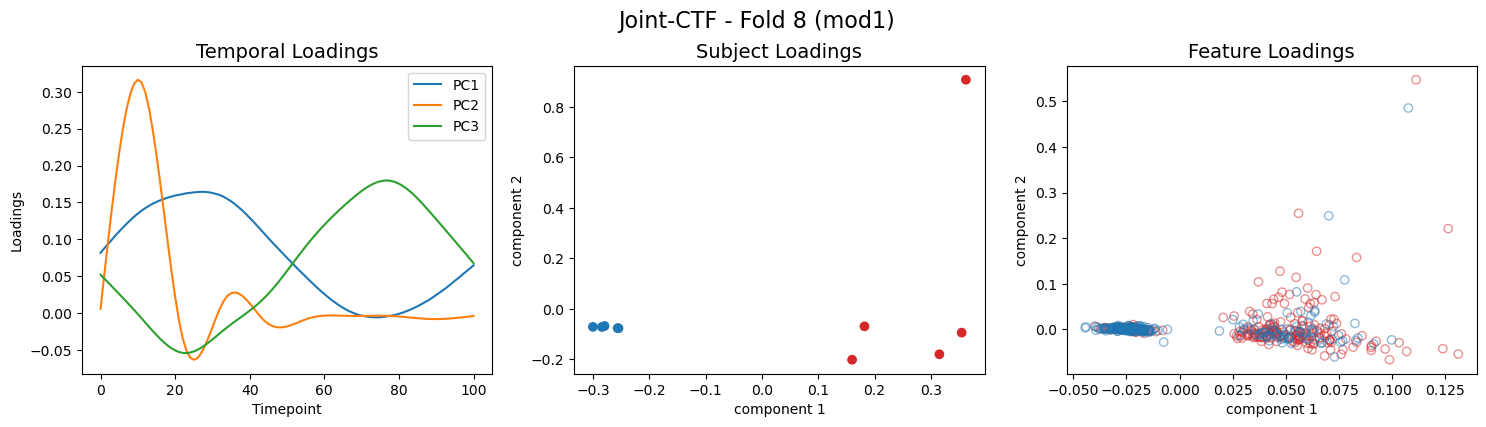

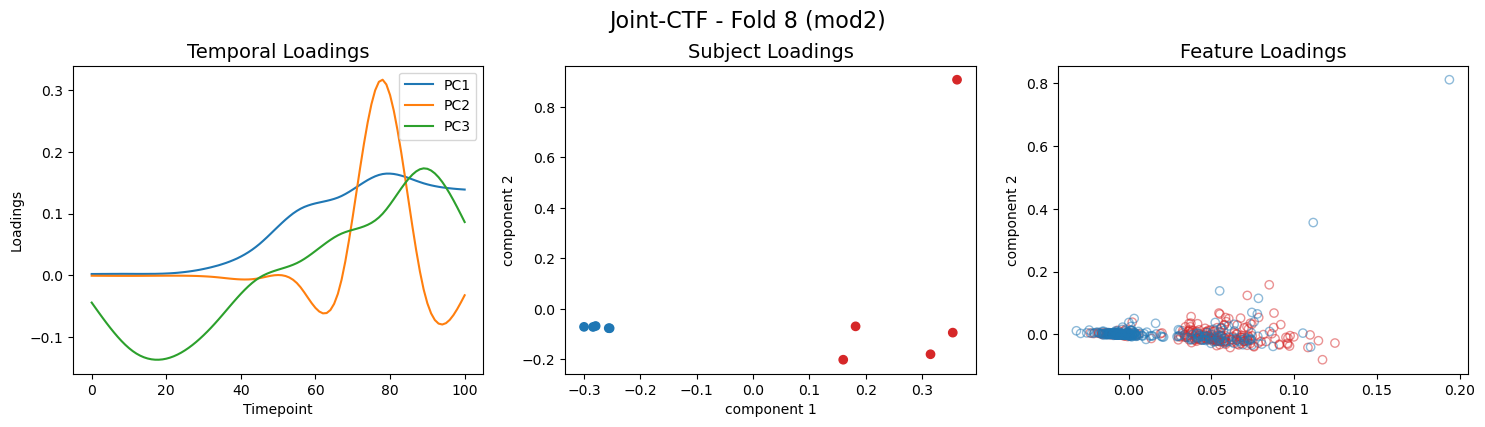

Calculate components for component_1
Reached convergence in 6 iterations
Calculate components for component_2
Reached convergence in 8 iterations
Calculate components for component_3
Reached convergence in 16 iterations


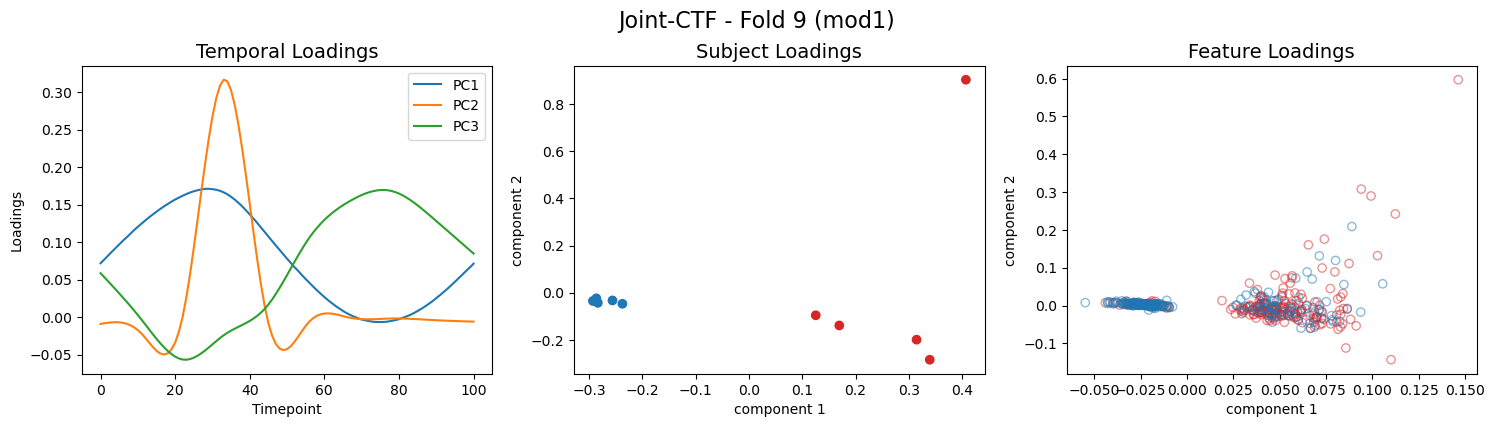

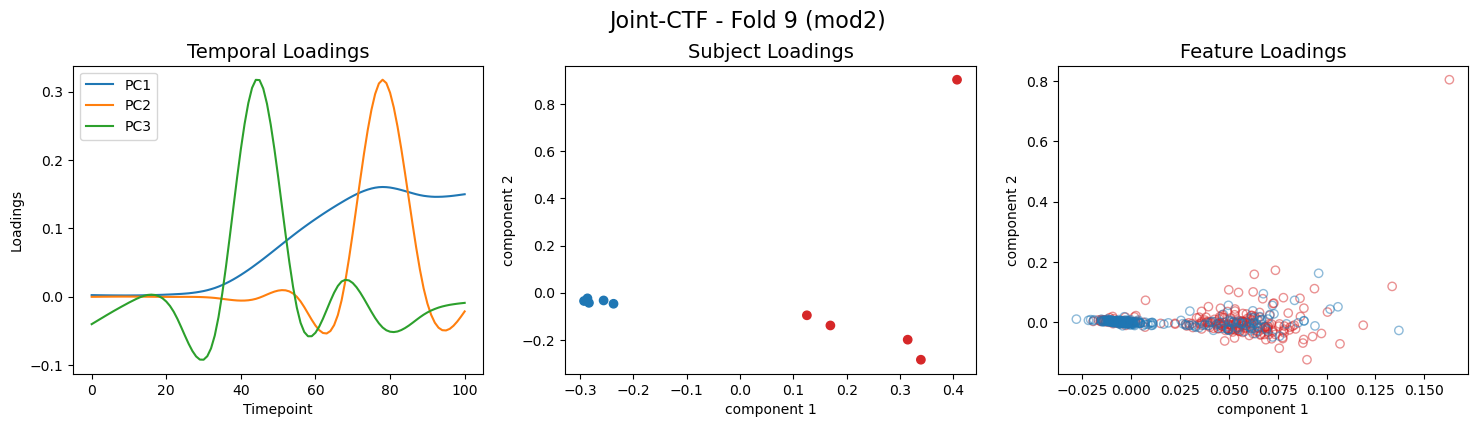

Calculate components for component_1
Reached convergence in 6 iterations
Calculate components for component_2
Reached convergence in 21 iterations
Calculate components for component_3
Reached convergence in 19 iterations


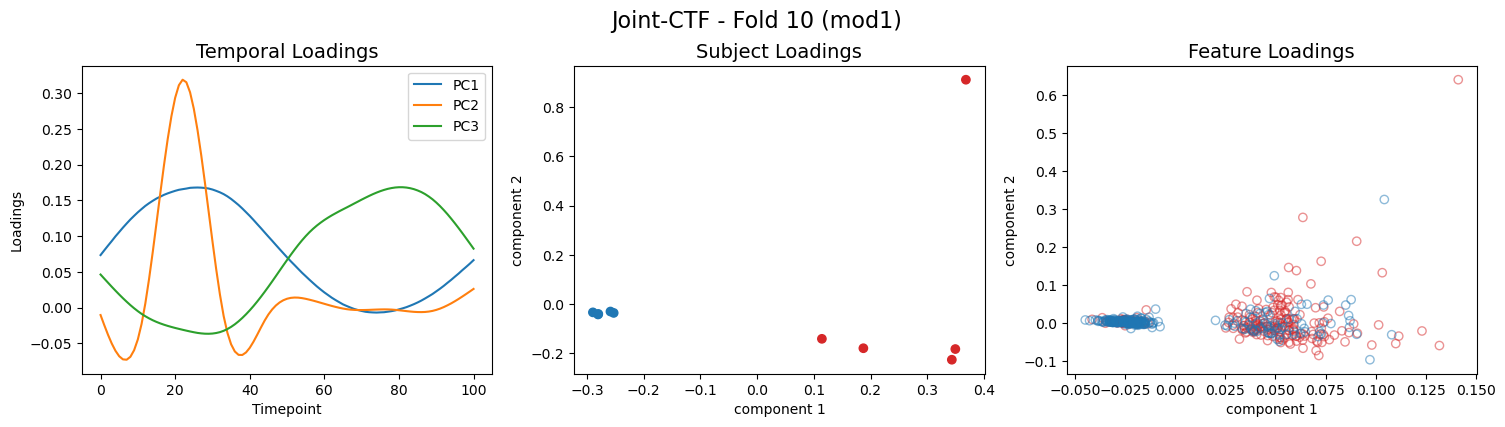

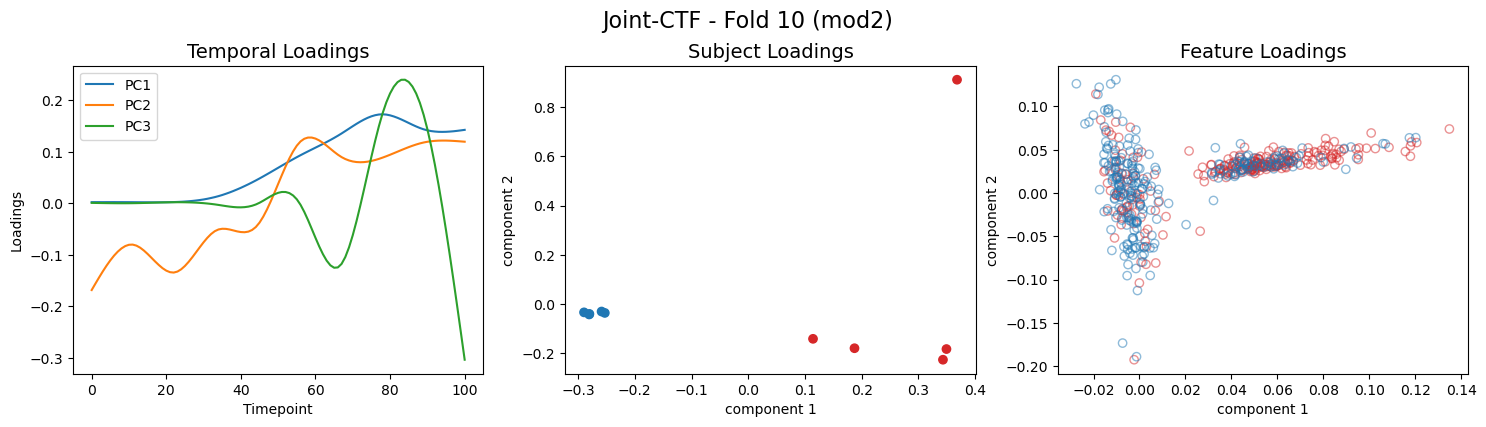

In [3]:
for i in range(0,10):
    _, _, noisy_mod3, mf_mod3 = create_sim_data('mod1', n_timepoints=10, n_subjects=10, 
                                            num_samples=100, num_features=500,
                                            rank=2, C_=2e3, spar=2e3,
                                            fxs=[sine_func], f_intervals=[[(0,250)]],
                                            s_intervals=[[(0,100)]], plotting=False,
                                            col_handle='individual')

    _, _, noisy_mod4, mf_mod4 = create_sim_data('mod2', n_timepoints=10, n_subjects=10, 
                                                num_samples=100, num_features=500,
                                                rank=2, C_=2e3, spar=2e3,
                                                fxs=[sigmoid], f_intervals=[[(0,250)]],
                                                s_intervals=[[(0,100)]], plotting=False,
                                                col_handle='individual')
    
    #run joint-ctf
    (subject_loads, feature_loads, state_loads,
    evals, var_explained, feature_covs) = joint_ctf(tables=[noisy_mod3, noisy_mod4],
                                                    sample_metadatas=[mf_mod3, mf_mod4],
                                                    modality_ids=['mod1', 'mod2'],
                                                    individual_id_column='ind_id',
                                                    state_column='timepoint')
    
    subject_loads_ = {}
    subject_loads_['mod1'] = subject_loads
    subject_loads_['mod2'] = subject_loads
        

    plot_loadings(loadings=[state_loads, feature_loads, subject_loads_],
              mf=mf_mod3, group_colors=group_colors, title='Joint-CTF - Fold {}'.format(i+1),
              comp1='component_1', comp2='component_2', mod_name='mod1',
              ft_groups=[(0,250),(250,500)], ft_names=['group1','group2'])

    plot_loadings(loadings=[state_loads, feature_loads, subject_loads_],
                mf=mf_mod4, group_colors=group_colors, title='Joint-CTF - Fold {}'.format(i+1),
                comp1='component_1', comp2='component_2', mod_name='mod2',
                ft_groups=[(0,250),(250,500)], ft_names=['group1','group2'])